<img src="images/banner.jpg" style="display:block; margin-left:auto; margin-right:auto;"/>

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting max rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 300)
pd.set_option("display.precision", 2)

In [3]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
#Modelling
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import pairwise_distances

### Loading the data

In [7]:
# importing dataset
df_reviews = pd.read_csv("data/sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


## Here are the attribute descriptions

In [9]:
df_reviews_attributes = pd.read_csv("data/Data+Attribute+Description.csv", encoding='latin')
df_reviews_attributes

,Attribute,Attribute Description
0,id,Uniques identity number to identify each unique review given by the user to a particular product in the dataset
1,brand,Name of the brand of the product to which user has given review and rating
2,categories,"Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more."
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added review or rating
5,reviews_date,Date on which the review has been added by the user
6,reviews_didPurchase,Whether a particular user has purchased the product or not
7,reviews_doRecommend,Whether a particular user has recommended the product or not
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


### Exploratory Data Analysis

In [11]:
df_reviews.shape

(30000, 15)

**There are total of 30,000 reviews present in the given dataset**

In [20]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [22]:
df_reviews['reviews_username'].nunique()

24914

**There are total of 24,914 unique users who has given reviews in the given dataset**

In [25]:
df_reviews['name'].nunique()

271

**There are total of 271 products for which users given the reviews in the given dataset**

#### Data Cleaning

**Handle Missing Values**

In [30]:
#Null value analysis
df_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

- The null-value assessment indicates that the missing data occurs only in fields that are not directly pertinent to the sentiment analysis, with the sole exception of one absent value in the user_sentiment column.
- This missing sentiment annotation can be reliably inferred from the corresponding reviews_rating, thereby preserving dataset completeness for subsequent model development.

In [33]:
def summarize_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a summary of missing values for all columns in a DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame to analyze.
        
    Returns
    -------
    pd.DataFrame
        A DataFrame containing the count and percentage of missing values
        for each column that has at least one missing entry.
    """

    # Identify columns with missing values
    cols_with_missing = df.columns[df.isna().any()]

    # Count of missing values
    missing_count = df[cols_with_missing].isna().sum().sort_values(ascending=False)

    # Percentage of missing values
    missing_percentage = (
        (missing_count / len(df)) * 100
    ).round(2)

    # Combine results into a single DataFrame
    missing_summary = pd.concat(
        [missing_count, missing_percentage],
        axis=1,
        keys=['Missing_Count', 'Missing_Percentage']
    )

    return missing_summary


In [35]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews)
df_missing_val_summary

,Missing_Count,Missing_Percentage
reviews_userProvince,29830,99.43
reviews_userCity,28071,93.57
reviews_didPurchase,14068,46.89
reviews_doRecommend,2570,8.57
reviews_title,190,0.63
manufacturer,141,0.47
reviews_username,63,0.21
reviews_date,46,0.15
user_sentiment,1,0.00


### **Observations & Insights on Missing Data**

#### **1. Location-related fields have extremely high missingness**
- **`reviews_userProvince` (99.43%)** and **`reviews_userCity` (93.57%)** are missing for nearly all records.  
- These fields are unlikely to add analytical value and are poor candidates for modeling without removal or heavy imputation.

**Implication:**  
These columns can be safely dropped unless geographic segmentation is specifically required.

---

#### **2. Purchase-related information is moderately missing**
- **`reviews_didPurchase`** has **46.89%** missing data — nearly half of the dataset.  
- This suggests that many reviewers do not specify whether they purchased the product.

**Implication:**  
The feature could still be useful, but missingness should be handled carefully (e.g., treat missing as a separate category).

---

#### **3. Recommendation indicator is mostly complete**
- **`reviews_doRecommend`** shows **8.57%** missing values.

**Implication:**  
This column remains reliable for analysis or modeling with minimal imputation required.

---

#### **4. Review content fields have very low missingness**
- **`reviews_title`** (0.63%)  
- **`manufacturer`** (0.47%)  
- **`reviews_username`** (0.21%)  
- **`reviews_date`** (0.15%)

**Implication:**  
These fields are generally complete and safe to include in further analysis.

---

#### **5. Sentiment label is effectively complete**
- **`user_sentiment`** has only **1 missing value** (0.00%).

**Implication:**  
This ensures strong dataset integrity for sentiment analysis; the single missing value can be easily imputed.

---

### **Overall Summary**
- Critical fields required for sentiment analysis and modeling are highly complete.  
- Location fields have extremely high missingness and offer limited analytical value.  
- Purchase-related missingness may hold behavioral insights and should be treated thoughtfully.  
- Overall, the dataset is well-suited for further analysis after minor preprocessing.


In [38]:
df_reviews_clean = df_reviews.copy()

In [40]:
df_reviews_clean.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace=True)

**Checking reviews_doRecommend column**

In [43]:
df_reviews_clean.reviews_doRecommend.value_counts(normalize=True)

reviews_doRecommend
True     0.94
False    0.06
Name: proportion, dtype: float64

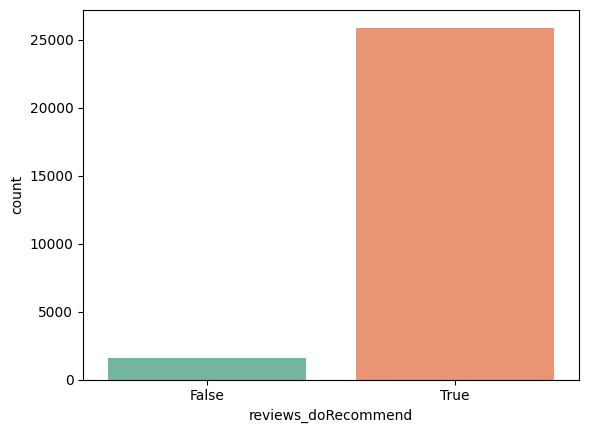

In [45]:
sns.countplot(x='reviews_doRecommend', data=df_reviews_clean, palette='Set2')
plt.show()

The `reviews_doRecommend` column is highly imbalanced, with approximately **94%** of entries marked as `True` and only **6%** marked as `False`. This extreme skew indicates that the feature carries very limited discriminatory power—there is insufficient variability for a model to learn any meaningful patterns from it. 

**Given its lack of predictive value and strong imbalance, this column will be dropped from further analysis and model training.**


In [48]:
df_reviews_clean.drop(columns=['reviews_doRecommend'], inplace=True)

**Let's check the latest missing value summary**

In [51]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews_clean)
df_missing_val_summary

,Missing_Count,Missing_Percentage
reviews_title,190,0.63
manufacturer,141,0.47
reviews_username,63,0.21
reviews_date,46,0.15
user_sentiment,1,0.00


**Handling NULL values in reviews_title**

The `reviews_title` column is a valuable feature for our analysis, as it contains the user-provided titles summarizing their product reviews. Since the proportion of missing values is extremely low (only **0.63%**), removing these rows will have a negligible impact on the dataset. Therefore, we will drop the records with missing `reviews_title` entries to maintain overall data quality and consistency.

In [55]:
df_reviews_clean = df_reviews_clean[~ df_reviews_clean.reviews_title.isna() ]

**Let's check the latest missing value summary**

In [58]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews_clean)
df_missing_val_summary

,Missing_Count,Missing_Percentage
manufacturer,141,0.47
reviews_username,62,0.21
reviews_date,46,0.15
user_sentiment,1,0.00


**Handling NULL values in reviews_username**

The `reviews_username` attribute serves as a unique user identifier and is therefore essential for ensuring accurate user-level tracking and analysis. Given that the percentage of missing values is exceptionally low (**0.20%**), the removal of these records will not compromise the representativeness of the dataset. Consequently, the affected rows will be excluded to preserve analytical rigor.

In [62]:
df_reviews_clean = df_reviews_clean[~ df_reviews_clean.reviews_username.isna() ]

In [64]:
# Checking rowcount post deletion
df_reviews_clean.shape

(29748, 11)

### Handling NULL values in user_sentiment

In [70]:
df_reviews_clean['user_sentiment'].value_counts()

user_sentiment
Positive    26412
Negative     3335
Name: count, dtype: int64

In [72]:
df_reviews_clean[ df_reviews_clean.user_sentiment.isna() ]

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,5,my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the poin...,a super hit with my children. they loved it!!??,7.87E+11,NaN


- Given that the `user_sentiment` column contains only one missing entry, the record was examined manually to determine the appropriate label. 
- The corresponding review title and rating indicate a favorable user experience.
- Accordingly, the missing sentiment value will be imputed as **“Positive”**, ensuring a fully labeled dataset for subsequent analysis.

**Update missing sentiment with the ratings**

In [76]:
# Define function to map ratings to sentiment
def infer_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'neutral'  # Optional: Can be ignored if working with only pos/neg

# Fill missing user_sentiment using reviews_rating
df_reviews_clean['user_sentiment'].fillna(df_reviews_clean['reviews_rating'].map(infer_sentiment), inplace=True)

In [78]:
# Verify missing value in user-sentiment column

df_reviews_clean['user_sentiment'].isnull().sum()

0

**Let's check the latest missing value summary**

In [81]:
# Getting total number of NULL values and percentage of the columns
df_missing_val_summary = summarize_missing_values(df_reviews_clean)
df_missing_val_summary

,Missing_Count,Missing_Percentage
manufacturer,141,0.47
reviews_date,40,0.13


- As neither `manufacturer` nor `reviews_date` serves a functional role in the development of the Sentiment Analysis or Recommender models, it's not required to address their missing values.
- These attributes will be omitted from further processing, ensuring that resources are focused solely on features relevant to model construction.

In [84]:
df_reviews_clean.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


### Data Analysis

**Checking Distribution of reviews_rating column**

In [88]:
# Analyze the rating column

df_reviews_clean["reviews_rating"].value_counts()

reviews_rating
5    20654
4     5992
1     1361
3     1332
2      409
Name: count, dtype: int64

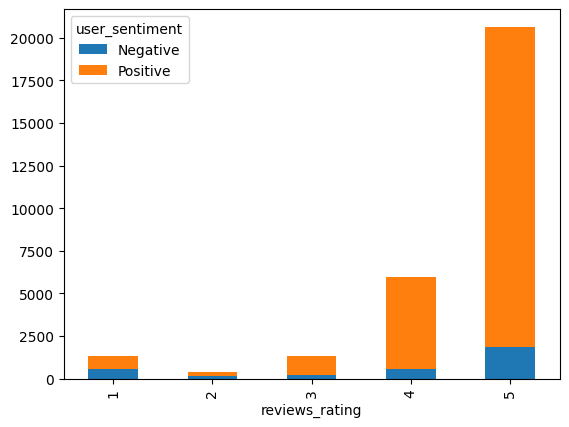

In [90]:
# Check sentiment distribution across ratings

df_reviews_clean.groupby(['reviews_rating', 'user_sentiment']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

The analysis of the `review_rating` vs `user_sentiment` distribution yields the following key insights:

- **Unexpected negative sentiments appear within ratings of 3, 4, and 5.**  
  This suggests potential mislabeling or cases where users assigned relatively high ratings yet expressed dissatisfaction in the review text. Such inconsistencies may arise from user behavior (e.g., rating leniency) or errors during the labeling process.

- **Positive sentiment labels are present in ratings of 1 and 2.**  
  These instances may reflect incorrect annotations, ambiguous review content, or the use of sarcasm or mixed sentiment in the text. They highlight the need to rely on textual content rather than ratings alone when determining sentiment.

Overall, these patterns indicate that **ratings are not always reliable proxies for sentiment**, reinforcing the value of text-based sentiment modeling.

**Checking Top 5 Brands with negative reviews**

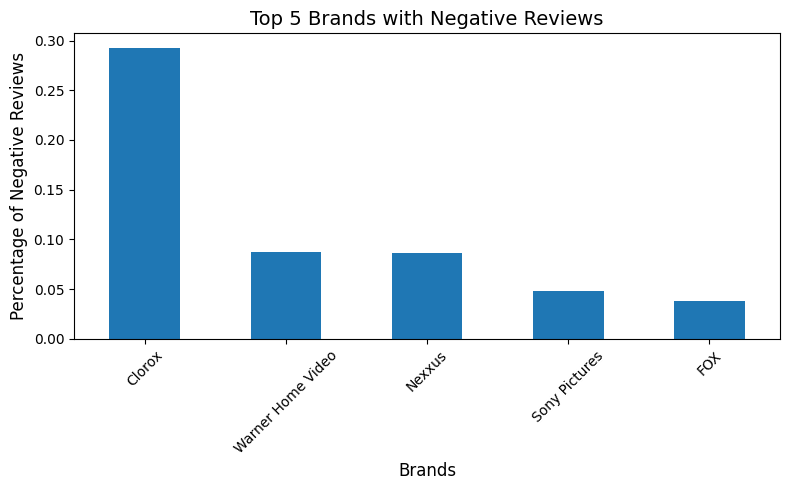

In [94]:
# Filter only negative reviews
negative_reviews = df_reviews_clean[df_reviews_clean['user_sentiment'] == 'Negative']

# Calculate top 5 brands with the highest percentage of negative reviews
top_negative_brands = (
    negative_reviews['brand']
        .value_counts(normalize=True, ascending=False)
        .head(5)
)

# Plot the results
plt.figure(figsize=(8, 5))
top_negative_brands.plot(kind='bar')

plt.title("Top 5 Brands with Negative Reviews", fontsize=14)
plt.xlabel("Brands", fontsize=12)
plt.ylabel("Percentage of Negative Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Inference from the Plot: Top 5 Brands with Negative Reviews**

The bar chart highlights the brands with the highest proportion of negative reviews. The insights are as follows:

- **Clorox stands out significantly**, with nearly **30%** of its reviews being negative. This is notably higher than all other brands and may indicate recurring product issues, quality concerns, or unmet customer expectations.

- **Warner Home Video** and **Nexxus** follow, each with roughly **9%** negative reviews. Although substantially lower than Clorox, these values still suggest noticeable areas where customer satisfaction may be lacking.

- **Sony Pictures** and **FOX** exhibit the lowest negative review percentages in the top 5, at around **5%** and **4%**, respectively. These figures suggest relatively better customer sentiment compared to the other brands in this group.

Overall, the distribution indicates that **Clorox is an outlier with a disproportionately high share of negative sentiment**, warranting deeper investigation into specific product categories or recurring complaint themes.


**Checking Top 5 Brands with positive reviews**

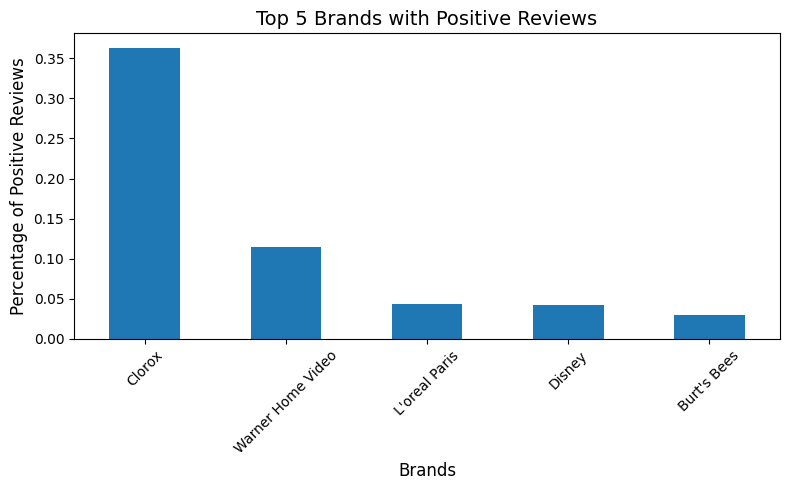

In [98]:
# Filter only positive reviews
positive_reviews = df_reviews_clean[df_reviews_clean['user_sentiment'] == 'Positive']

# Calculate the top 5 brands with the highest percentage of positive reviews
top_positive_brands = (
    positive_reviews['brand']
        .value_counts(normalize=True, ascending=False)
        .head(5)
)

# Plot the results
plt.figure(figsize=(8, 5))
top_positive_brands.plot(kind='bar')

plt.title("Top 5 Brands with Positive Reviews", fontsize=14)
plt.xlabel("Brands", fontsize=12)
plt.ylabel("Percentage of Positive Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Inference from the Plot: Top 5 Brands with Positive Reviews**

The bar chart highlights the brands with the highest proportion of positive sentiment among all product reviews. Key observations include:

- **Clorox dominates with the largest share of positive reviews**, accounting for approximately **36%** of all positive sentiment. This suggests strong customer satisfaction and consistent positive feedback across its products.

- **Warner Home Video** holds the second position with around **11%** positive reviews. While significantly lower than Clorox, it still represents a notable portion of positive sentiment within the dataset.

- **L’Oreal Paris**, **Disney**, and **Burt’s Bees** contribute smaller percentages, each ranging between **3–5%** of total positive reviews. These brands show generally favorable customer experiences but with a smaller review volume compared to the top two.

- The sharp drop from Clorox to the remaining brands indicates that **positive sentiment is heavily concentrated around a few key brands**, with Clorox being a clear outlier in customer approval.

Overall, the visualization suggests that **Clorox enjoys significantly higher positive customer sentiment** relative to other leading brands in this dataset.


In [101]:
df_reviews_clean.brand.value_counts(normalize=True).head(5)

brand
Clorox               0.36
Warner Home Video    0.11
Disney               0.04
L'oreal Paris        0.04
FOX                  0.03
Name: proportion, dtype: float64

**Key Observation**

It is noteworthy that Clorox appears as the most positively reviewed brand, with over **36%** of all positive reviews attributed to it. At first glance, this may seem surprising—especially since Clorox also appears among the top brands with negative reviews. 

However, upon further inspection of the dataset, we observe that **Clorox accounts for approximately 36% of all brand entries overall**. This means Clorox has the highest representation in the dataset, resulting in a naturally higher number of reviews—both positive and negative. 

Therefore, Clorox’s dominance in both sentiment categories is not an anomaly or an error in analysis; rather, it reflects its **large review volume** within the dataset. The brand's strong presence simply increases the likelihood of appearing at the top of both positive and negative sentiment distributions.

**Checking review counts based on the review year**

In [106]:
# Before type conversion
df_reviews_clean.reviews_date.dtype

dtype('O')

In [108]:
df_reviews_clean['reviews_date'] = pd.to_datetime(df_reviews_clean['reviews_date'], errors='coerce')

In [110]:
# After type conversion
df_reviews_clean.reviews_date.dtype

datetime64[ns, UTC]

In [112]:
# Getting year component from date
df_reviews_clean.reviews_date.dt.year

0        2012.0
1        2017.0
2        2017.0
3        2016.0
4        2016.0
          ...  
29995    2017.0
29996    2017.0
29997    2017.0
29998    2017.0
29999    2017.0
Name: reviews_date, Length: 29748, dtype: float64

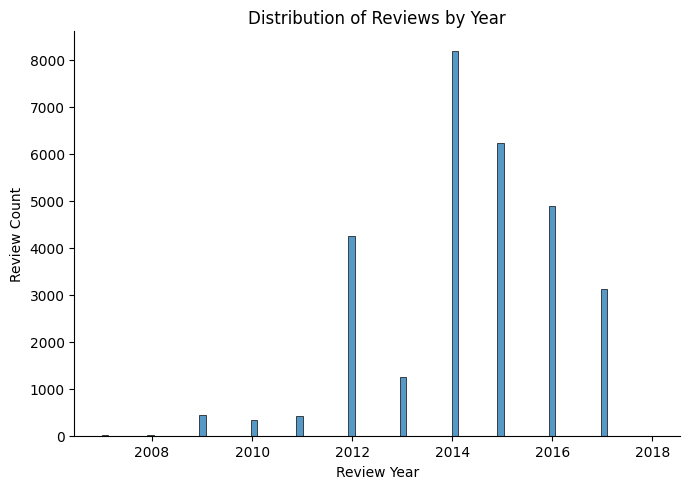

In [114]:
# Creating a distribution plot based on reviews year 
# Extract review year

# Create a distribution plot of reviews by year
sns.displot(
    data=df_reviews_clean,
    x=df_reviews_clean['reviews_date'].dt.year,
    kde=False,
    height=5,
    aspect=1.4
).set(
    title="Distribution of Reviews by Year",
    xlabel="Review Year",
    ylabel="Review Count"
)

plt.tight_layout()
plt.show()

#### **Inference from the Review Distribution by Year**

- **Very few reviews appear before 2011**, indicating little activity or limited data availability during early years.

- **A noticeable increase occurs in 2012**, where review counts rise significantly compared to prior years.

- **Review activity drops in 2013**, showing fewer reviews than in 2012.

- **The most significant spike occurs in 2014**, which records the **highest number of reviews** in the entire dataset. This is the clear peak year for review activity.

- **Review counts remain relatively high in 2015 and 2016**, though lower than the 2014 peak.

- **Activity declines further in 2017**, continuing a downward trend from the earlier peak years.

- **Data for 2018 shows almost no activity**, likely because the dataset does not include complete review records for that year.

---

#### **Summary**
The review trend shows a **major surge in 2014**, followed by a gradual decline. No sharp increase occurs in 2013—rather, **2014 is the true inflection point** with the highest user engagement in the dataset.



**Checking Movie categories by Rating**

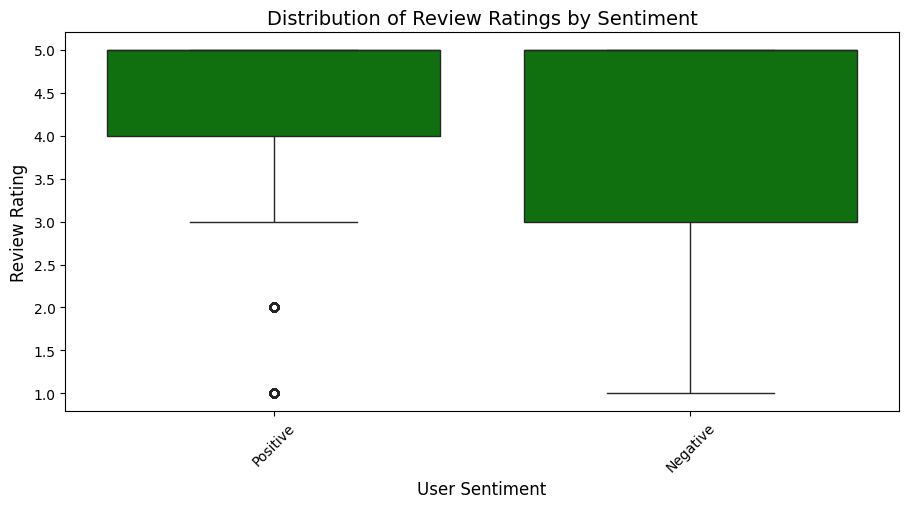

In [118]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_reviews_clean,
    x='user_sentiment',
    y='reviews_rating',
    color='green'
)

plt.title("Distribution of Review Ratings by Sentiment", fontsize=14)
plt.xlabel("User Sentiment", fontsize=12)
plt.ylabel("Review Rating", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout(pad=4)
plt.show()

#### **Accurate Inferences from the Boxplot: Review Ratings by Sentiment**

- **Positive reviews generally have higher ratings**, with most ratings clustering between **4 and 5**.  
  The median rating for positive sentiment lies at **5**, showing that users who express positive sentiment tend to give the highest possible score.

- **Negative reviews show a wider spread of ratings**, ranging from **1 to 5**.  
  Although the lower ratings (1–2) are more common for negative sentiment, there are still several negative reviews with ratings as high as **4 and 5**, indicating mismatches between rating and sentiment text.

- **Both sentiment groups share the same upper bound (rating = 5)**, which means that giving a high rating does not always correspond to positive textual sentiment.

- **Outliers exist in both categories**, especially:
  - **Positive sentiment with ratings 1–2**, meaning some users wrote positive-text reviews but gave low star ratings.
  - **Negative sentiment includes high-rating outliers**, meaning some users wrote negative-text reviews but rated the product favorably.

- **Negative reviews have a visibly lower median rating** (around **3**) compared to positive ones, confirming that rating distributions do somewhat align with sentiment labels, but not perfectly.

---

#### **Summary**
The boxplot reveals that although ratings and sentiment generally correlate, **there are notable inconsistencies**—some users leave positive comments but assign low ratings and vice versa. This highlights why text-based sentiment analysis is necessary rather than relying solely on numerical ratings.


#### Identify and Analyze Conflicting Cases
- We can extract cases where the sentiment label does not align with the rating and analyze their text.

In [122]:
# -----------------------------
# Identify Misclassified Reviews
# -----------------------------

# High ratings (4–5) incorrectly labeled as negative
high_rating_negative = df_reviews_clean[
    (df_reviews_clean['reviews_rating'] >= 4) &
    (df_reviews_clean['user_sentiment'] == 'Negative')
]

# Low ratings (1–2) incorrectly labeled as positive
low_rating_positive = df_reviews_clean[
    (df_reviews_clean['reviews_rating'] <= 2) &
    (df_reviews_clean['user_sentiment'] == 'Positive')
]

# -----------------------------
# Display Sample Mismatched Reviews
# -----------------------------
print("High Ratings (4–5) Labeled as Negative:")
print(high_rating_negative[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))
print("\n--------------------------------------------------\n")

print("Low Ratings (1–2) Labeled as Positive:")
print(low_rating_positive[['reviews_rating', 'reviews_text', 'user_sentiment']].head(10))

High Ratings (4–5) Labeled as Negative:
     reviews_rating  \
92                4   
96                4   
100               4   
106               4   
117               4   
121               4   
144               4   
153               4   
160               4   
166               4   

                                                                                                                                                                                                                                                   reviews_text  \
92                                                                                                                                       It hydrates my skin. It is not too thick and heavy when I put it on. This review was collected as part of a promotion.   
96                                                                                                                                             In only a week I can see the difference in my

#### **Observations Based on the Output**

An examination of the extracted samples reveals clear **misalignments between star ratings and sentiment labels**, indicating issues with the original annotation process. These inconsistencies suggest that several reviews were incorrectly categorized, rather than reflecting sarcasm or mixed sentiment.

---

#### **1. High Ratings (4–5 Stars) Incorrectly Labeled as Negative**
Many reviews with 4- or 5-star ratings express strong satisfaction, describing benefits such as:
- smoother skin  
- deep hydration  
- effective absorption  
- reduction in blemishes  

**Example:**  
> *"Regenerist provides deep hydration for the skin. I find my skin is smoother after use."*  
This review is clearly positive in tone but was labeled as **Negative**, indicating a misclassification rather than sarcasm.

**Conclusion:**  
These cases overwhelmingly reflect **positive sentiment** and should not be classified as negative.

**Recommended Action:**  
Reclassify sentiment as **"Positive"** whenever:  
`reviews_rating ≥ 4` **AND** `user_sentiment == 'Negative'`

---

#### **2. Low Ratings (1–2 Stars) Incorrectly Labeled as Positive**
Several reviews with low ratings describe dissatisfaction, disappointment, or product failure, yet were labeled as **Positive**.

**Example:**  
> *"Purchased this thinking it would have some sort of warming effect, but it's the same as the original. Don't waste your money."*  
This conveys clear negative sentiment but was classified as positive.

**Another example:**  
> *"Leaves windows with streaks, although it does seem to work OK on other surfaces."*  
The tone is mostly negative, despite acknowledging limited effectiveness.

While a few instances might involve subtle sarcasm, the majority are straightforward negative reviews that were mislabeled.

**Recommended Action:**  
Reclassify sentiment as **"Negative"** whenever:  
`reviews_rating ≤ 2` **AND** `user_sentiment == 'Positive'`

---

#### **Overall Insight**
The inconsistencies indicate that the dataset contains **numerous sentiment labeling errors**, especially when ratings contradict the assigned sentiment category. Correcting these cases will significantly improve sentiment model performance and dataset reliability.


**Alignment of Sentiment based on given Ratings**

In [125]:
# Function to correct mislabeled sentiment based on rating logic
def correct_sentiment(row):
    sentiment = str(row['user_sentiment']).strip().lower()
    rating = row['reviews_rating']
    
    # High ratings (4–5) should reflect positive sentiment
    if rating >= 4 and sentiment == 'negative':
        return 'Positive'
    
    # Low ratings (1–2) should reflect negative sentiment
    elif rating <= 2 and sentiment == 'positive':
        return 'Negative'
    
    # Otherwise, keep the original sentiment label
    return row['user_sentiment']

# Apply the correction logic to the dataset
df_reviews_clean['user_sentiment'] = df_reviews_clean.apply(correct_sentiment, axis=1)

<Figure size 1000x600 with 0 Axes>

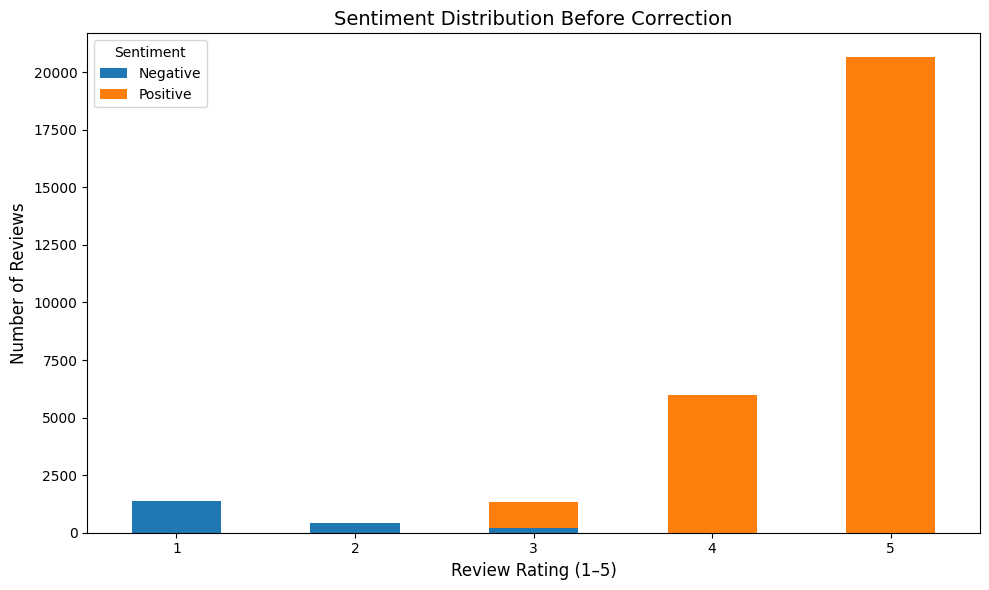

In [127]:
# Plot sentiment distribution before correction
plt.figure(figsize=(10, 6))

(
    df_reviews_clean
    .groupby(['reviews_rating', 'user_sentiment'])
    .size()
    .unstack(fill_value=0)
    .plot(kind='bar', stacked=True, figsize=(10, 6))
)

plt.title("Sentiment Distribution Before Correction", fontsize=14)
plt.xlabel("Review Rating (1–5)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()
plt.show()

#### **Accurate Inferences from the Sentiment Distribution Before Correction**

- **5-star reviews make up the largest portion of the dataset**, with an overwhelming majority labeled as **Positive**. This indicates that most users tend to give the highest rating and express positive sentiment.

- **4-star reviews also show a strong dominance of Positive sentiment**, though with noticeably fewer reviews than 5-star ratings. Positive sentiment aligns well with the rating expectation here.

- **3-star reviews contain mostly Positive sentiment**, suggesting that many users perceive a 3-star rating as acceptable or favorable. This indicates a potential rating bias where moderate ratings still carry positive sentiment.

- **1-star and 2-star reviews are predominantly Negative**, which aligns correctly with the expected sentiment for low ratings. Users assigning lower ratings generally express dissatisfaction.

- A **small number of Negative reviews appear in 3-star category**, indicating sentiment–rating mismatches. These inconsistencies highlight issues with label accuracy prior to correction.

- **No Positive sentiment appears within the 1-star category**, and very minimal (if any) positive sentiment appears in 2-star reviews, which is consistent with correct labeling.

---

#### **Summary**
The distribution clearly shows:
- Strong positive sentiment for high ratings (4–5 stars)
- Strong negative sentiment for low ratings (1–2 stars)
- Minor but notable sentiment–rating inconsistencies, especially where moderate ratings (3 stars) are labeled as Positive and occasional Negative labels appear at higher ratings.

These inconsistencies justify the need for correcting misclassified sentiment labels.


### Type Conversion

In [131]:
# List of text-based columns that require conversion to string
text_columns = [
    'brand', 'categories', 'manufacturer', 'name',
    'reviews_text', 'reviews_title', 'reviews_username'
]

# Convert selected columns to string type
df_reviews_clean[text_columns] = df_reviews_clean[text_columns].astype(str)

### Data PreProcessing

In [134]:
# Getting a copy of dataframe for pre-processing
df_reviews_preprocessed = df_reviews_clean.copy()

**Combining reviews_text and reviews_title columns into reviews_combined and dropping the initial fields**

In [137]:
df_reviews_preprocessed['full_review'] = df_reviews_preprocessed['reviews_title'] + " " + df_reviews_preprocessed['reviews_text']
df_reviews_preprocessed.drop(columns=['reviews_title', 'reviews_text'], inplace=True)

In [139]:
df_reviews_preprocessed.shape

(29748, 10)

In [141]:
df_reviews_preprocessed[["full_review", "user_sentiment"]].sample(10)

,full_review,user_sentiment
12247,love this product love the scent and the clean filling it leaves in my home! This review was collected as part of a promotion.,Positive
9369,Clorox Products I use Clorox wipes in my home and in my classroom at school. The quality has always been good. I also use the toilet cleaning products and have been very pleased with the outcome of the product. This review was collected as part of a promotion.,Positive
5388,Rating my order Use this product all the time,Positive
4296,"Great suction!!! I've had this vacuum for a couple of years, and it still works great. Someone at Bed Bath Beyond recommended this vacuum and I'm glad I listened. I looked this up to copy the info for a friend and just had to write a review saying how satisfied I am with it. It hasn't lost sucti...",Positive
19897,"This product is versitile I love clorox wipes. I use them in and out of my home and I feel better about germs after I have used them. I recommend using them in the kitchen, bathroom and on shopping carts!",Positive
7523,Love the product great and easy to use for messes This review was collected as part of a promotion.,Positive
3282,Personal Est muy bueno y excelente para una oficina.,Positive
13732,No germs allowed Perfect for my ocd. I would not go without having some at my desk at work and in each bathroom and kitchen at home. Love this product! This review was collected as part of a promotion.,Positive
25669,godzilla become helping human being. This movie's quality and story are better than previous editions I borrowed from library.,Positive
26545,"Do not use on babies face I generally LOVE Aveeno products but this one falls short. Babies and toddlers are active, and they rub their eyes, and they cry. This sunscreen, if it gets into their eyes, will have you feeling like the worst parent in the world. My baby girl looked like she was in so...",Negative


In [143]:
df_reviews_preprocessed.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_rating', 'reviews_username', 'user_sentiment', 'full_review'],
      dtype='object')

**Dropping columns which are not needed for analysis**

In [146]:
df_reviews_preprocessed.drop(columns=['categories', 'manufacturer', 'reviews_date'], inplace=True)

In [148]:
df_reviews_preprocessed.head(1)

,id,brand,name,reviews_rating,reviews_username,user_sentiment,full_review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.


**Creating dataframe for Sentiment analysis with only the required columns**

In [151]:
df_sent_analysis = df_reviews_preprocessed[['id','name','full_review', 'reviews_rating', 'user_sentiment']]

In [153]:
df_sent_analysis.shape

(29748, 5)

In [155]:
df_sent_analysis.head()

,id,name,full_review,reviews_rating,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as part of a promotion.,5,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,5,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....",1,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,1,Negative


In [157]:
import re
import string
from contractions import fix
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    """
    Preprocess review text by:
    - Expanding contractions
    - Lowercasing
    - Removing numbers, punctuation, and special patterns
    - Normalizing whitespace
    - Tokenizing
    - Removing stopwords
    - Lemmatizing tokens
    
    Returns a clean, preprocessed string.
    """

    # Handle non-string inputs gracefully
    if not isinstance(text, str):
        return ""

    # 1. Expand contractions (e.g., “don’t” → “do not”)
    text = fix(text)

    # 2. Lowercase the text
    text = text.lower().strip()

    # 3. Remove unwanted patterns
    text = re.sub(r"\[.*?\]", "", text)            # Remove text inside brackets
    text = re.sub(r"\d+", "", text)                # Remove numbers
    text = re.sub(r"\s+", " ", text)               # Normalize whitespace

    # 4. Remove punctuation efficiently
    punctuation_table = str.maketrans("", "", string.punctuation)
    text = text.translate(punctuation_table)

    # 5. Tokenization
    tokens = word_tokenize(text)

    # 6. Stopword removal
    tokens = [word for word in tokens if word not in stop_words]

    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


In [159]:
#!pip install contractions

In [161]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [163]:
df_final = df_sent_analysis[['id','name', 'full_review', 'reviews_rating', 'user_sentiment']]

In [165]:
# Apply preprocessing
df_final['cleaned_review'] = df_final['full_review'].apply(preprocess_text)

In [166]:
df_final.head()

,id,name,full_review,reviews_rating,user_sentiment,cleaned_review
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as part of a promotion.,5,Positive,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,5,Positive,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....",1,Negative,disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked cap...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,1,Negative,irritation husband bought gel u gel caused irritation felt like burning skin would recommend gel


#### WordCloud

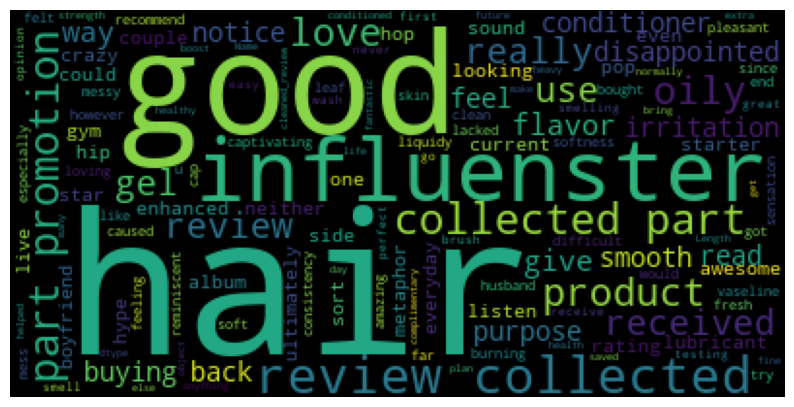

In [168]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(df_final.cleaned_review))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Review Length Analysis with respect to Sentiment Label
- Check if Review Length Differs by Sentiment Label

In [170]:
df_final['review_length'] = df_final['cleaned_review'].apply(len)

In [171]:
# check if positive and negative reviews have significantly different lengths.

df_final.groupby('user_sentiment')['review_length'].describe()

,count,mean,std,min,25%,50%,75%,max
user_sentiment,,,,,,,,
Negative,1987.0,195.42,153.98,8.0,93.0,160.0,250.0,2320.0
Positive,27761.0,122.13,108.81,4.0,65.0,94.0,142.0,3815.0


#### **Inferences Based on the Output**

- **Negative reviews are significantly longer on average** than positive reviews.  
  - Negative mean length: **195.42**  
  - Positive mean length: **122.13**  
  This suggests that users tend to write more detailed explanations when expressing dissatisfaction.

- **The variability (standard deviation) in negative review length is also higher** (153.98 vs. 108.81), indicating greater inconsistency in how much users write when leaving negative feedback.

- **The maximum length of positive reviews is higher** (3815 characters) compared to negative reviews (2320 characters).  
  This indicates that although negatives are typically longer, some positive reviews can be extremely verbose.

- **Median (50th percentile) lengths show the same pattern:**  
  - Negative reviews median: **160 characters**  
  - Positive reviews median: **94 characters**  
  Again confirming that negative reviews consistently contain more text.

- **Lower quartile (25th percentile) also reflects the trend:**  
  - Negative: **93 characters**  
  - Positive: **65 characters**  
  Even shorter negative reviews tend to be more descriptive.

- **Negative reviews are fewer in number (1,987) compared to positive reviews (27,761)**, but they contain richer textual information per review.

---

#### **Summary**
Negative reviews are **substantially longer, more detailed, and more variable**, while positive reviews are **shorter and more uniform**, suggesting that dissatisfied users provide more explanation to justify their sentiment.


#### Analysis : Review Length vs. Sentiment

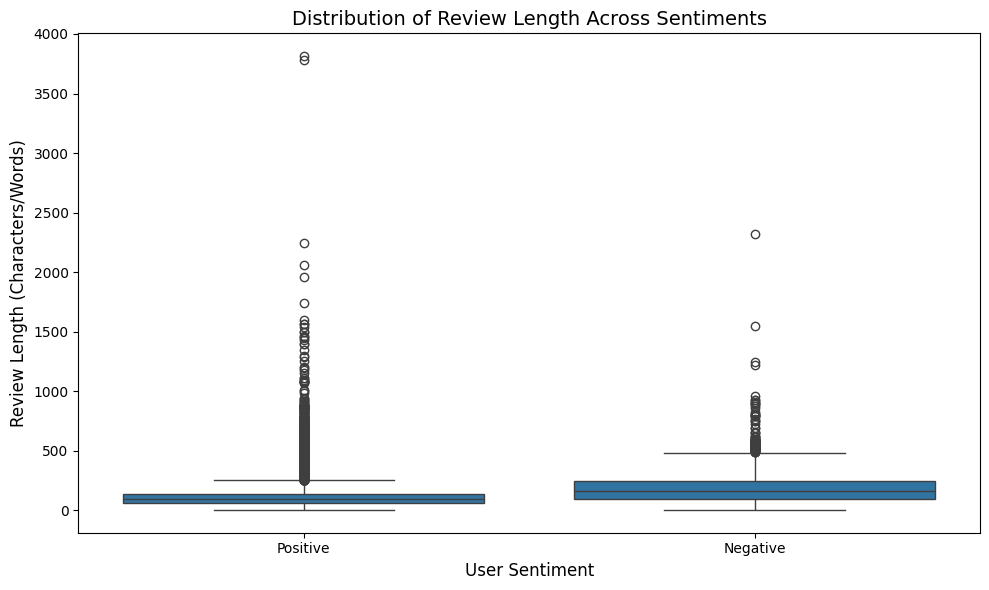

In [179]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_final,
    x='user_sentiment',
    y='review_length'
)

plt.title("Distribution of Review Length Across Sentiments", fontsize=14)
plt.xlabel("User Sentiment", fontsize=12)
plt.ylabel("Review Length (Characters/Words)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Inferences from the Distribution of Review Length Across Sentiments**

The boxplot provides insights into how review length varies between **Positive** and **Negative** sentiment categories:

---

#### **1. Negative Reviews tend to be longer on average**
- The median review length for **Negative** sentiment is noticeably higher than that for **Positive** sentiment.
- This indicates that users expressing dissatisfaction often write **longer, more detailed explanations** of their negative experiences.

---

#### **2. Positive Reviews are generally shorter and more consistent**
- Positive reviews cluster more tightly around shorter lengths.
- Many positive reviews may be brief affirmations (e.g., “Great product!”, “Loved it!”), leading to a lower median and tighter interquartile range (IQR).

---

#### **3. Both Sentiments contain extreme outliers**
- Extremely long reviews (1000–3800 characters/words) appear in both categories.
- These outliers likely represent customers who provide **very detailed feedback**, regardless of sentiment.
- However, the **Positive** category shows more very-long outliers, including the maximum review length (~3800).

---

#### **4. Negative Reviews show higher variability**
- The boxplot for Negative sentiment spans a wider range.
- This suggests users vary more in how much they express dissatisfaction — from short complaints to lengthy, detailed critiques.

---

#### **5. Review Length is not a perfect indicator of sentiment**
- Despite differences in medians and ranges, both positive and negative reviews overlap significantly.
- This indicates that review length alone cannot reliably predict sentiment but **may serve as a useful supporting feature** in modeling.

---

#### **Summary**
Negative reviews are generally longer and more varied, while positive reviews tend to be shorter and more consistent. Both categories contain long-form outliers, showing that highly detailed feedback can be both appreciative and critical. T


### Statistical Hypothesis Testing
- To confirm statistically whether review length significantly differs between positive and negative reviews, use a t-test.

In [183]:
import scipy.stats as stats

# Separate review lengths by sentiment
positive_reviews = df_final[df_final['user_sentiment'] == 'Positive']['review_length']
negative_reviews = df_final[df_final['user_sentiment'] == 'Negative']['review_length']

# Perform Welch's t-test (does not assume equal variance)
t_stat, p_value = stats.ttest_ind(
    positive_reviews,
    negative_reviews,
    equal_var=False
)

print("Welch's T-Test for Review Length Differences")
print(f"T-statistic : {t_stat:.4f}")
print(f"P-value     : {p_value:.6f}")

# Interpretation helper
if p_value < 0.05:
    print("\n Result: Statistically significant difference in review length between sentiments.")
else:
    print("\n Result: No statistically significant difference in review length between sentiments.")

Welch's T-Test for Review Length Differences
T-statistic : -20.8493
P-value     : 0.000000

 Result: Statistically significant difference in review length between sentiments.


### TF-IDF Feature Extraction

### **Feature Extraction Using TF-IDF**

To transform the raw review text into numerical features suitable for machine learning models, we apply **TF-IDF (Term Frequency–Inverse Document Frequency)**. This method highlights terms that are important within individual reviews while down-weighting terms that are overly common across the corpus.

- **`max_df`** controls the removal of extremely frequent terms.  
  These are often non-informative and act as **corpus-specific stopwords**.  
  Setting `max_df = 0.95` means:  
  **Ignore terms that appear in more than 95% of all documents**, as they provide little discriminative value.

- **`min_df`** controls the removal of extremely rare terms.  
  These terms contribute noise, add sparsity, and rarely help the model generalize.  
  Setting `min_df = 5` means:  
  **Ignore terms that appear in fewer than 5 documents**, ensuring that only meaningful and recurring terms remain.

This configuration helps create a more robust, informative TF-IDF feature matrix by filtering out both overly common and overly rare words.


In [187]:
df_final.head()

,id,name,full_review,reviews_rating,user_sentiment,cleaned_review,review_length
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,115
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as part of a promotion.,5,Positive,good good flavor review collected part promotion,48
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,5,Positive,good good flavor,16
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation....",1,Negative,disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked cap...,413
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,1,Negative,irritation husband bought gel u gel caused irritation felt like burning skin would recommend gel,96


In [189]:
# Split into 80% train, 20% test
X = df_final[['cleaned_review', 'review_length']]
y = df_final['user_sentiment'].map({'Positive': 1, 'Negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [191]:
#Check for duplication of reviews in train and test dataset to avoid data leakage
overlap = pd.merge(
    X_train[['cleaned_review']],
    X_test[['cleaned_review']],
    on='cleaned_review',
    how='inner'
).drop_duplicates()
overlap_vals = overlap['cleaned_review'].unique()
print(f"Number of overlapping samples: {len(overlap_vals)}")
print(f"X_train shape before: {X_train.shape}")

Number of overlapping samples: 858
X_train shape before: (23798, 2)


In [193]:
from typing import Tuple
import pandas as pd

def remove_overlapping_reviews(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    overlap: pd.DataFrame,
    text_col: str = "cleaned_review"
) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Remove rows from X_train / y_train where the review text appears in `overlap`.

    Parameters
    ----------
    X_train : pd.DataFrame
        Training features containing a text column.
    y_train : pd.Series
        Training target aligned with X_train (same index).
    overlap : pd.DataFrame
        DataFrame containing text entries that should be treated as overlap.
    text_col : str, optional
        Name of the column in X_train and overlap that contains the cleaned text, by default "cleaned_review".

    Returns
    -------
    Tuple[pd.DataFrame, pd.Series]
        (X_train_cleaned, y_train_cleaned) with overlapping rows removed and indices reset.
    """

    # Ensure the text column exists
    if text_col not in X_train.columns:
        raise KeyError(f"'{text_col}' not found in X_train columns.")

    if text_col not in overlap.columns:
        raise KeyError(f"'{text_col}' not found in overlap columns.")

    # Work on copies so originals are preserved
    X = X_train.copy()
    y = y_train.copy()

    # Build boolean mask and compute indices to drop (use index to avoid misalignment)
    overlap = pd.merge(
        X_train[[text_col]],
        X_test[[text_col]],
        on=text_col,
        how='inner'
    ).drop_duplicates()

    overlap_vals = overlap[text_col].unique()
    overlap_mask = X_train[text_col].isin(overlap_vals)
    indices_to_drop = X[overlap_mask].index

    removed_count = len(indices_to_drop)
    before_shape = X.shape

    # Drop by index and reset indexes
    if removed_count > 0:
        X = X.drop(index=indices_to_drop).reset_index(drop=True)
        # Align y by dropping the same indices
        y = y.drop(index=indices_to_drop).reset_index(drop=True)
    else:
        # Still reset index to keep consistency with downstream code if desired
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)

    after_shape = X.shape

    print(f"Removed overlapping rows: {removed_count}")
    print(f"X_train shape before: {before_shape} -> after: {after_shape}")

    return X, y


In [195]:
X_train_clean, y_train_clean = remove_overlapping_reviews(X_train, y_train, overlap, text_col='cleaned_review')

Removed overlapping rows: 913
X_train shape before: (23798, 2) -> after: (22885, 2)


In [197]:
# TF-IDF extraction from text feature
vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=0.01,
    max_df=0.8,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_review'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_review'])

In [198]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

scaler = MinMaxScaler()

# Fit scaler on training numeric features only
X_train_num = scaler.fit_transform(X_train[['review_length']])
X_test_num = scaler.transform(X_test[['review_length']])

# Combine scaled numeric features with TF-IDF
X_train_combined = hstack((X_train_tfidf, X_train_num))
X_test_combined = hstack((X_test_tfidf, X_test_num))

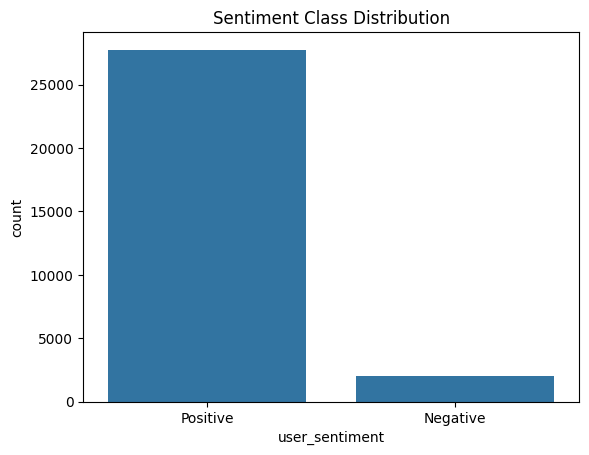

user_sentiment
Positive    93.32
Negative     6.68
Name: proportion, dtype: float64


In [199]:
# Check class distribution

sns.countplot(x=df_final['user_sentiment'])
plt.title("Sentiment Class Distribution")
plt.show()

# Print exact counts
print(df_final['user_sentiment'].value_counts(normalize=True) * 100)  # Percentage of each class

#### **Inferences from the Sentiment Class Distribution**

- The dataset is **highly imbalanced**, with **Positive reviews dominating the distribution**.
  - **Positive sentiment:** ~93.32% of all reviews  
  - **Negative sentiment:** ~6.68% of all reviews  

- This strong skew indicates that the majority of users express favorable opinions about the products, while only a small fraction leave negative feedback.

- The **imbalance poses a significant challenge for model training**, as a classifier may become biased toward predicting the majority class (Positive) and perform poorly on the minority class (Negative).

- Special handling techniques will likely be required to improve model performance, such as:
  - **Resampling methods** (e.g., oversampling the Negative class or undersampling the Positive class)
  - **Class-weight adjustments** during model training
  - **Synthetic data generation** (e.g., SMOTE)
  - **Using evaluation metrics** beyond accuracy (e.g., F1-score, recall, ROC-AUC)

- The low proportion of negative sentiment also suggests that **user complaints or dissatisfaction are relatively rare** within the dataset, which could affect the system's ability to learn nuanced negative expressions.

---

#### **Summary**
The dataset is overwhelmingly positive (~93%), creating a substantial class imbalance that must be addressed to build a reliable sentiment classification model.


In [204]:
from imblearn.combine import SMOTETomek
from collections import Counter

# -------------------------------
# Apply SMOTE + Tomek Links (Train Set Only)
# -------------------------------

# Initialize the resampling technique
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Fit and resample
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_combined, y_train)

# -------------------------------
# Review the Resampled Distribution
# -------------------------------

print("\n Class Distribution Before Resampling:")
print(pd.Series(y_train).value_counts(normalize=True).mul(100).round(2))

print("\n Class Distribution After SMOTE + Tomek:")
print(pd.Series(y_train_resampled).value_counts(normalize=True).mul(100).round(2))

print("\n Resampled shapes:")
print(f"X_train_resampled: {X_train_resampled.shape}")
print(f"y_train_resampled: {y_train_resampled.shape}")


 Class Distribution Before Resampling:
user_sentiment
1    93.32
0     6.68
Name: proportion, dtype: float64

 Class Distribution After SMOTE + Tomek:
user_sentiment
1    50.0
0    50.0
Name: proportion, dtype: float64

 Resampled shapes:
X_train_resampled: (44390, 343)
y_train_resampled: (44390,)


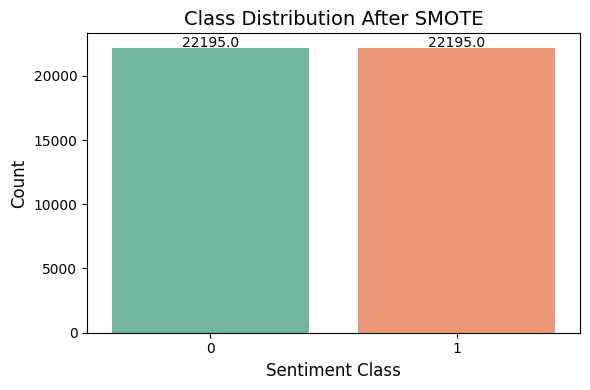

In [205]:
plt.figure(figsize=(6, 4))

sns.countplot(x=y_train_resampled, palette="Set2")
plt.title("Class Distribution After SMOTE", fontsize=14)
plt.xlabel("Sentiment Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add value labels on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2, 
        height + 50,                   
        f"{height}", 
        ha="center", 
        fontsize=10
    )

plt.tight_layout()
plt.show()

#### **Insights from the Class Distribution After Applying SMOTE**

---

#### **1. Successful Balancing of Sentiment Classes**
The application of **SMOTETomek** has resulted in a perfectly balanced dataset, with an equal number of samples in both sentiment classes.  
- **Class 0 (Negative): ~22,195 samples**  
- **Class 1 (Positive): ~22,195 samples**  
This eliminates the extreme class imbalance present earlier (≈93% positive, 7% negative), ensuring the model no longer defaults toward predicting the majority class.

---

#### **2. Improved Model Learning and Fairness**
With balanced classes, the model can now:
- Learn **meaningful features for both positive and negative sentiment**,  
- **Avoid biasing predictions** toward the previously dominant class, and  
- Handle real-world use cases where identifying negative sentiment is especially important (e.g., product defects, customer complaints).

This balanced training set promotes **better generalization** and **more equitable performance** across classes.

---

#### **3. Consideration of SMOTE-Related Risks**
While SMOTE helps mitigate imbalance, it synthesizes new samples rather than collecting real data.  
This can introduce risks such as:
- **Overfitting to synthetic patterns**,  
- Reduced model robustness if the minority class originally contained noisy or highly varied samples,  
- Artificial inflation of metrics when evaluated only on resampled data.

Thus, SMOTE should be applied **only to the training set**, never to validation or test sets.

---

#### **4. Importance of Rigorous Model Evaluation**
With oversampling applied, traditional accuracy metrics might not fully reflect model performance.  
To ensure reliable evaluation, you should use:
- **Precision, Recall, and F1-score**, especially for the minority (negative) class  
- **ROC-AUC** to assess class separability  
- **Cross-validation** to confirm the model generalizes beyond the resampled training data  

These approaches help detect any weaknesses introduced by synthetic data and validate that performance improvements are genuine.

---

#### **Summary**
The SMOTETomek process has successfully rebalanced the dataset, enabling the model to learn from both sentiment classes equally. However, **careful evaluation is necessary** to prevent overconfidence and ensure that the model remains reliable when exposed to real-world, unseen data.


In [207]:
#!pip install imblearn

### Building Model

In [211]:
import logging
from typing import Any, Dict, Optional, Tuple
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report

# Configure logging once at the top of your notebook/script
logging.basicConfig(level=logging.INFO, format="%(message)s")
logger = logging.getLogger(__name__)


class ModelBuilder:
    """
    Helper class to train and evaluate a classification model with convenient plotting.

    Parameters
    ----------
    model : estimator
        A scikit-learn-like estimator implementing fit() and predict().
    x_train, x_test : array-like
        Training and test features.
    y_train, y_test : array-like
        Training and test labels (binary or multiclass).
    """

    def __init__(
        self,
        model: Any,
        x_train: Any,
        x_test: Any,
        y_train: Any,
        y_test: Any,
    ) -> None:
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self) -> Any:
        """Train the model and return predicted classes on the test set."""
        logger.info("Training model...")
        self.model.fit(self.x_train, self.y_train)
        y_pred = self.model.predict(self.x_test)
        logger.info("Training complete.")
        return y_pred

    def evaluate_model(
        self,
        y_pred_class: Any,
        *,
        save_plots: Optional[str] = None,
        return_plots: bool = False
    ) -> Dict[str, Optional[float]]:
        """
        Run a full evaluation pipeline: prints metrics, displays classification report,
        plots confusion matrix and ROC curve.

        Parameters
        ----------
        y_pred_class : array-like
            Predicted class labels for x_test.
        save_plots : Optional[str]
            Directory path to save the generated plots (set to None to avoid saving).
        return_plots : bool
            If True, return matplotlib figure objects for further processing.

        Returns
        -------
        results : dict
            Dictionary containing Accuracy, Precision, Recall, F1 Score, ROC-AUC (if available).
        """
        logger.info("\n" + "=" * 60)
        logger.info("MODEL EVALUATION STARTED")
        logger.info("=" * 60 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        logger.info("\n" + "=" * 60)
        logger.info("CLASSIFICATION REPORT")
        logger.info("=" * 60 + "\n")
        self.display_classification_report(y_pred_class)

        logger.info("\n" + "=" * 60)
        logger.info("CONFUSION MATRIX")
        logger.info("=" * 60 + "\n")
        cm_fig = self.plot_confusion_matrix(y_pred_class)
        if save_plots and cm_fig:
            cm_fig.savefig(f"{save_plots}/confusion_matrix.png", bbox_inches="tight")

        logger.info("\n" + "=" * 60)
        logger.info("ROC CURVE")
        logger.info("=" * 60 + "\n")
        roc_fig = self.plot_roc_curve()
        if save_plots and roc_fig:
            roc_fig.savefig(f"{save_plots}/roc_curve.png", bbox_inches="tight")

        logger.info("\n" + "=" * 60)
        logger.info("MODEL EVALUATION COMPLETED")
        logger.info("=" * 60 + "\n")

        if return_plots:
            return {"results": results, "confusion_fig": cm_fig, "roc_fig": roc_fig}
        return results

    def evaluate_metrics(self, y_pred_class: Any) -> Dict[str, Optional[float]]:
        """
        Compute core classification metrics and ROC-AUC if available.
        Returns a dictionary of results (numbers are floats, proportions between 0 and 1).
        """
        # Basic checks
        if len(np.unique(self.y_test)) == 1:
            logger.warning("Only one class present in y_test — some metrics may be undefined.")

        results: Dict[str, Optional[float]] = {}
        results["Accuracy"] = metrics.accuracy_score(self.y_test, y_pred_class)
        # For precision/recall/f1, handle zero_division to avoid exceptions
        results["Precision"] = metrics.precision_score(self.y_test, y_pred_class, zero_division=0)
        results["Recall"] = metrics.recall_score(self.y_test, y_pred_class, zero_division=0)
        results["F1 Score"] = metrics.f1_score(self.y_test, y_pred_class, zero_division=0)

        # ROC-AUC: try predict_proba, then decision_function
        roc_auc: Optional[float] = None
        try:
            if hasattr(self.model, "predict_proba"):
                y_scores = self.model.predict_proba(self.x_test)[:, 1]
                roc_auc = metrics.roc_auc_score(self.y_test, y_scores)
            elif hasattr(self.model, "decision_function"):
                y_scores = self.model.decision_function(self.x_test)
                roc_auc = metrics.roc_auc_score(self.y_test, y_scores)
            else:
                roc_auc = None
        except Exception as exc:
            logger.warning(f"Could not compute ROC-AUC: {exc}")
            roc_auc = None

        results["ROC-AUC Score"] = roc_auc

        # Nicely print metrics as percentages where applicable
        logger.info("\n" + "-" * 50)
        logger.info("MODEL PERFORMANCE METRICS")
        logger.info("-" * 50)
        for metric_name, value in results.items():
            if value is None:
                logger.info(f"{metric_name}: N/A")
            else:
                # show ROC-AUC as proportion, others as percentage
                if metric_name == "ROC-AUC Score":
                    logger.info(f"{metric_name}: {value:.4f}")
                else:
                    logger.info(f"{metric_name}: {value * 100:.2f}%")
        logger.info("-" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class: Any) -> Optional[plt.Figure]:
        """
        Plot confusion matrix with both counts and normalized percentages.
        Returns the matplotlib Figure for optional saving.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)
        cm_norm = cm.astype("float") / cm.sum()

        labels = np.array([["{:,}\n{:.2%}".format(cm[i, j], cm_norm[i, j]) for j in range(cm.shape[1])]
                           for i in range(cm.shape[0])])

        fig, ax = plt.subplots(figsize=(6, 5))
        sns.heatmap(cm_norm, annot=labels, fmt="", cmap="Blues", cbar=False, ax=ax,
                    xticklabels=["Pred_Neg", "Pred_Pos"][:cm.shape[1]],
                    yticklabels=["True_Neg", "True_Pos"][:cm.shape[0]])
        ax.set_ylabel("True Label")
        ax.set_xlabel("Predicted Label")
        ax.set_title("Confusion Matrix (counts and %)")
        plt.tight_layout()
        plt.show()

        return fig

    def plot_roc_curve(self) -> Optional[plt.Figure]:
        """
        Plot ROC curve if model supports probability or decision scores.
        Returns the matplotlib Figure or None if not supported.
        """
        fig = None
        try:
            if hasattr(self.model, "predict_proba") or hasattr(self.model, "decision_function"):
                fig, ax = plt.subplots(figsize=(6, 5))
                RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test, ax=ax)
                ax.set_title("ROC Curve")
                plt.tight_layout()
                plt.show()
            else:
                logger.warning("ROC Curve cannot be plotted: model has no predict_proba/decision_function.")
        except Exception as exc:
            logger.warning(f"Failed to plot ROC curve: {exc}")
            fig = None

        return fig

    def display_classification_report(self, y_pred_class: Any) -> None:
        """
        Nicely print the classification report (precision/recall/f1 per class).
        """
        try:
            report_dict = metrics.classification_report(self.y_test, y_pred_class, output_dict=True, zero_division=0)
            # Pretty print per-class metrics
            for label, metrics_vals in report_dict.items():
                if label in ("accuracy", "macro avg", "weighted avg"):
                    # Summary rows
                    logger.info(f"\n{label.upper()}:")
                    for k, v in metrics_vals.items():
                        if isinstance(v, (float, int)):
                            if k == "support":
                                logger.info(f"  {k}: {int(v)}")
                            else:
                                logger.info(f"  {k}: {v:.4f}")
                else:
                    logger.info(f"\nCLASS: {label}")
                    for k, v in metrics_vals.items():
                        if k == "support":
                            logger.info(f"  {k}: {int(v)}")
                        else:
                            logger.info(f"  {k}: {v:.4f}")
            logger.info("")  # spacer
        except Exception as exc:
            logger.warning(f"Could not generate classification report: {exc}")


### Logistic Regression

Training model...
Training complete.

MODEL EVALUATION STARTED


--------------------------------------------------
MODEL PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 89.83%
Precision: 98.70%
Recall: 90.29%
F1 Score: 94.31%
ROC-AUC Score: 0.9513
--------------------------------------------------


CLASSIFICATION REPORT


CLASS: 0
  precision: 0.3805
  recall: 0.8338
  f1-score: 0.5225
  support: 397

CLASS: 1
  precision: 0.9870
  recall: 0.9029
  f1-score: 0.9431
  support: 5553

ACCURACY:
Could not generate classification report: 'float' object has no attribute 'items'

CONFUSION MATRIX



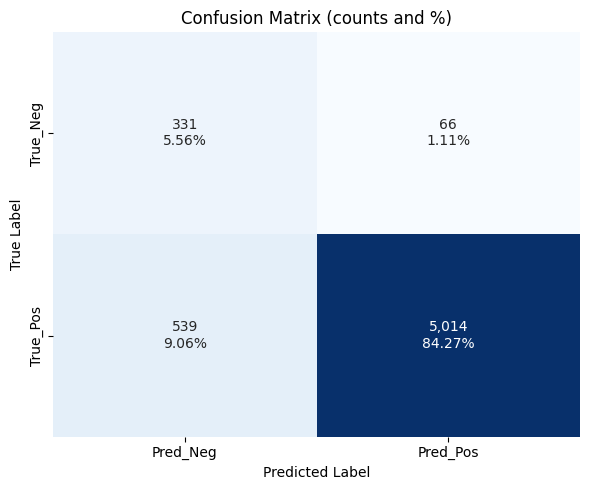


ROC CURVE



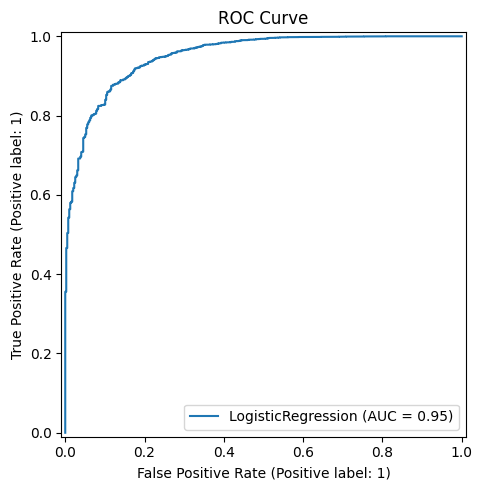


MODEL EVALUATION COMPLETED



In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_lr = LogisticRegression()

# Create ModelBuilder instance
builder_lr = ModelBuilder(model_lr, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_lr.train_model()

# Evaluate model
metrics_result_lr = builder_lr.evaluate_model(y_pred)

### Naive Bayes

Training model...
Training complete.

MODEL EVALUATION STARTED


--------------------------------------------------
MODEL PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 88.03%
Precision: 98.36%
Recall: 88.65%
F1 Score: 93.26%
ROC-AUC Score: 0.9289
--------------------------------------------------


CLASSIFICATION REPORT


CLASS: 0
  precision: 0.3333
  recall: 0.7935
  f1-score: 0.4694
  support: 397

CLASS: 1
  precision: 0.9836
  recall: 0.8865
  f1-score: 0.9326
  support: 5553

ACCURACY:
Could not generate classification report: 'float' object has no attribute 'items'

CONFUSION MATRIX



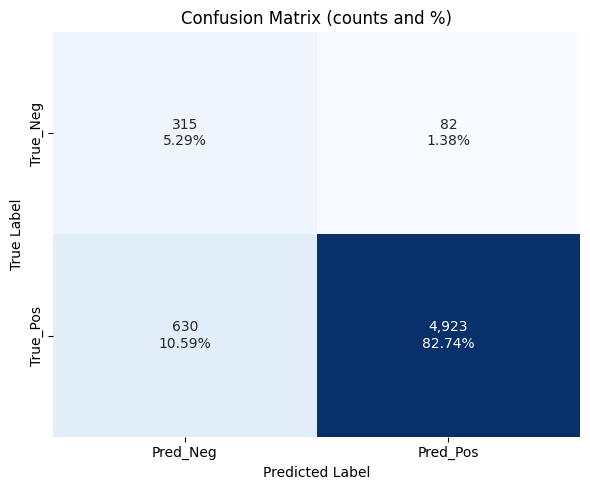


ROC CURVE



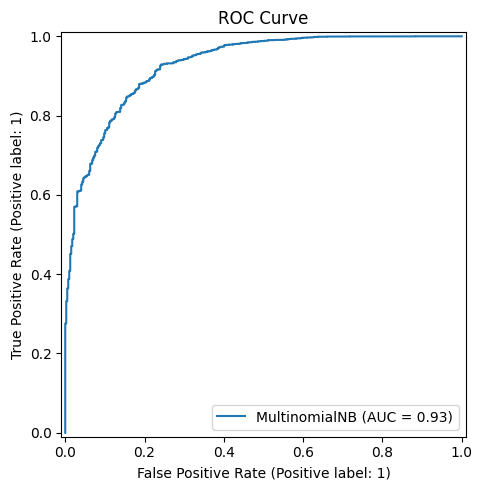


MODEL EVALUATION COMPLETED



In [216]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



# Initialize model

model_nb = MultinomialNB(alpha=1.0)

# Create ModelBuilder instance
builder_nb = ModelBuilder(model_nb, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_nb.train_model()

# Evaluate model
metrics_result_nb = builder_nb.evaluate_model(y_pred)

### Decision Tree

Training model...
Training complete.

MODEL EVALUATION STARTED


--------------------------------------------------
MODEL PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 80.94%
Precision: 98.59%
Recall: 80.73%
F1 Score: 88.77%
ROC-AUC Score: 0.8822
--------------------------------------------------


CLASSIFICATION REPORT


CLASS: 0
  precision: 0.2373
  recall: 0.8388
  f1-score: 0.3700
  support: 397

CLASS: 1
  precision: 0.9859
  recall: 0.8073
  f1-score: 0.8877
  support: 5553

ACCURACY:
Could not generate classification report: 'float' object has no attribute 'items'

CONFUSION MATRIX



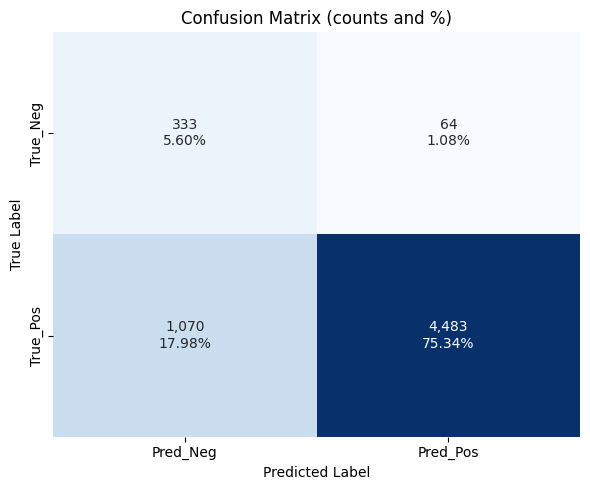


ROC CURVE



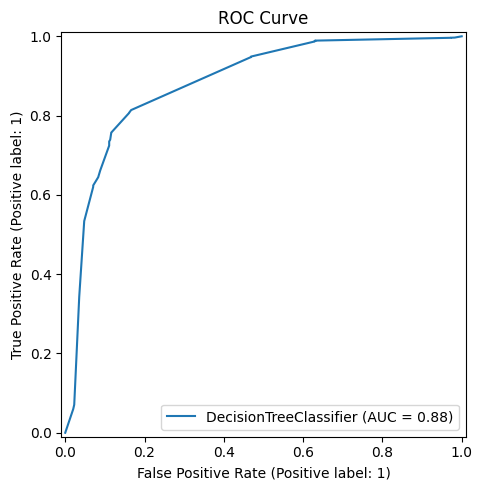


MODEL EVALUATION COMPLETED



In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model

model_dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

# Create ModelBuilder instance
builder_dt = ModelBuilder(model_dt, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_dt.train_model()

# Evaluate model
metrics_result_dt = builder_dt.evaluate_model(y_pred)

### Random Forest

Training model...
Training complete.

MODEL EVALUATION STARTED


--------------------------------------------------
MODEL PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 96.17%
Precision: 97.52%
Recall: 98.40%
F1 Score: 97.96%
ROC-AUC Score: 0.9455
--------------------------------------------------


CLASSIFICATION REPORT


CLASS: 0
  precision: 0.7435
  recall: 0.6499
  f1-score: 0.6935
  support: 397

CLASS: 1
  precision: 0.9752
  recall: 0.9840
  f1-score: 0.9796
  support: 5553

ACCURACY:
Could not generate classification report: 'float' object has no attribute 'items'

CONFUSION MATRIX



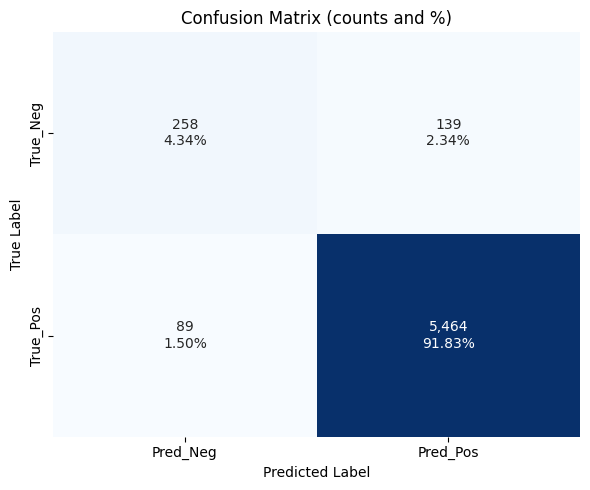


ROC CURVE



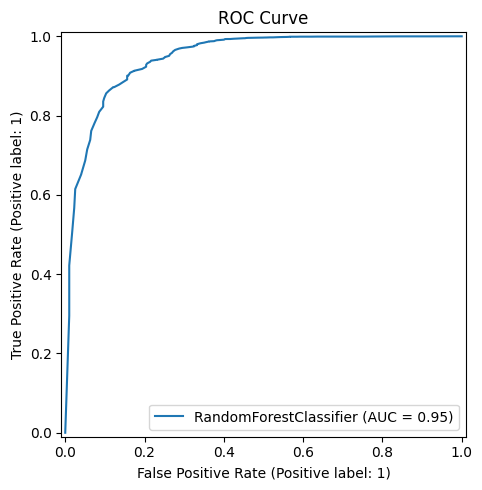


MODEL EVALUATION COMPLETED



In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create ModelBuilder instance
builder_rf = ModelBuilder(model_rf, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_rf.train_model()

# Evaluate model
metrics_result_rf = builder_rf.evaluate_model(y_pred)

### XGBoost

Training model...
Training complete.

MODEL EVALUATION STARTED


--------------------------------------------------
MODEL PERFORMANCE METRICS
--------------------------------------------------
Accuracy: 94.42%
Precision: 97.80%
Recall: 96.18%
F1 Score: 96.99%
ROC-AUC Score: 0.9432
--------------------------------------------------


CLASSIFICATION REPORT


CLASS: 0
  precision: 0.5665
  recall: 0.6977
  f1-score: 0.6253
  support: 397

CLASS: 1
  precision: 0.9780
  recall: 0.9618
  f1-score: 0.9699
  support: 5553

ACCURACY:
Could not generate classification report: 'float' object has no attribute 'items'

CONFUSION MATRIX



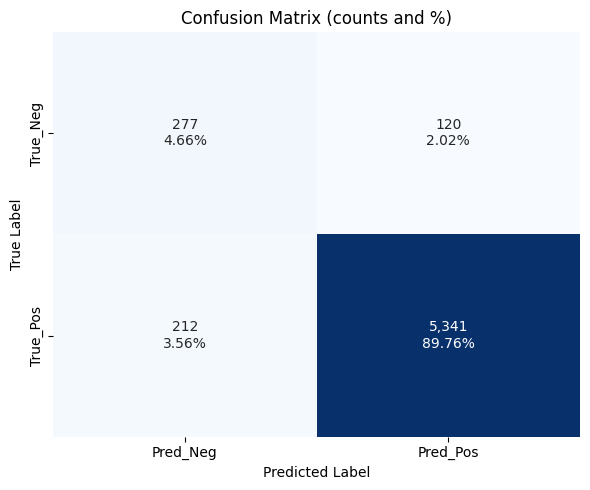


ROC CURVE



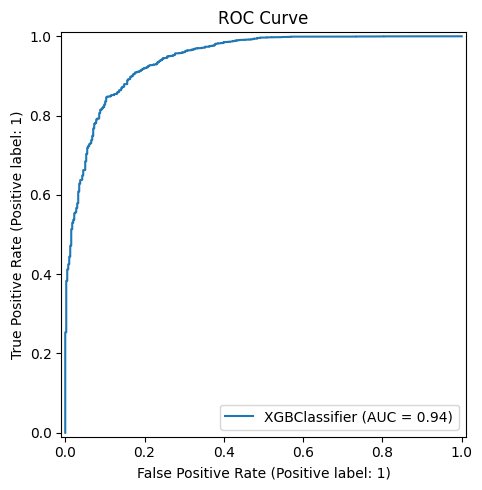


MODEL EVALUATION COMPLETED



In [221]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='auc')

# Create ModelBuilder instance
builder_xgb = ModelBuilder(model_xgb, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Train model
y_pred = builder_xgb.train_model()

# Evaluate model
metrics_result_xgb = builder_xgb.evaluate_model(y_pred)

In [226]:
# Creating a table containing all model evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metrics_result_lr),
    'Naïve Bayes': pd.Series(metrics_result_nb),
    'Decision Tree': pd.Series(metrics_result_dt),
    'Random Forest': pd.Series(metrics_result_rf),
    'XGBoost': pd.Series(metrics_result_xgb)
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Display the metrics table
df_metrics

,Metric,Logistic Regression,Naïve Bayes,Decision Tree,Random Forest,XGBoost
Accuracy,Accuracy,0.90,0.88,0.81,0.96,0.94
Precision,Precision,0.99,0.98,0.99,0.98,0.98
Recall,Recall,0.90,0.89,0.81,0.98,0.96
F1 Score,F1 Score,0.94,0.93,0.89,0.98,0.97
ROC-AUC Score,AUC Score,0.95,0.93,0.88,0.95,0.94


In [115]:
#!pip install xgboost

Next Steps for Improvement
🔹 Hyperparameter tuning for Decision Tree to reduce overfitting.
🔹 Deploy XGBoost or Logistic Regression for production, with monitoring for model drift.

### Correlation Analysis

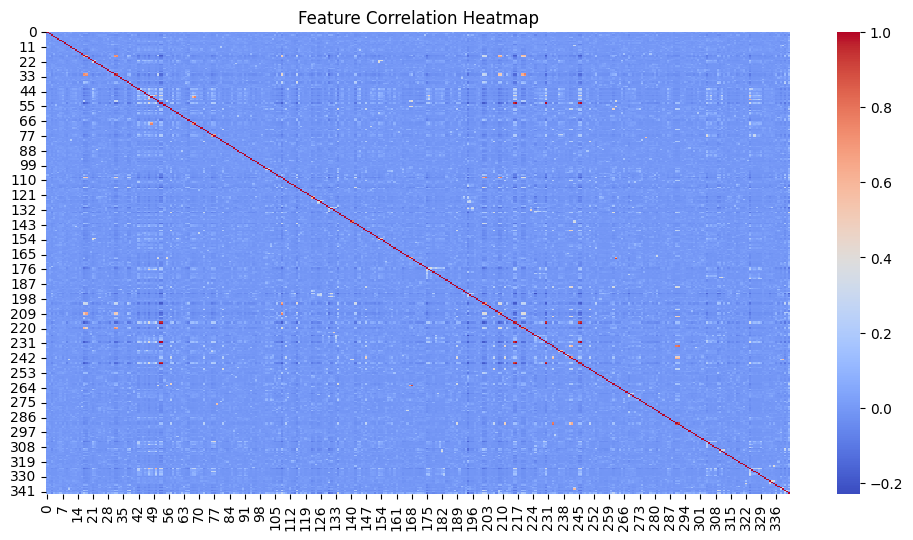

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sparse matrix to dense array
X_train_dense = X_train_resampled.toarray()

# Create DataFrame for correlation calculation
df_train = pd.DataFrame(X_train_dense)

# Compute correlation matrix
correlation_matrix = df_train.corr()

# Though we do the analysis on entire dataset, but we should run on sample instead

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [225]:
print(correlation_matrix)

          0         1         2         3         4         5         6    \
0    1.00e+00 -6.76e-03 -1.05e-02 -1.03e-03  8.89e-03 -3.12e-03  1.08e-02   
1   -6.76e-03  1.00e+00 -1.21e-02  1.45e-02 -7.14e-04  4.16e-03  1.44e-02   
2   -1.05e-02 -1.21e-02  1.00e+00 -7.80e-03  7.09e-03 -1.17e-02 -1.85e-02   
3   -1.03e-03  1.45e-02 -7.80e-03  1.00e+00 -6.09e-03  7.75e-03  3.83e-03   
4    8.89e-03 -7.14e-04  7.09e-03 -6.09e-03  1.00e+00 -1.02e-02  1.14e-02   
..        ...       ...       ...       ...       ...       ...       ...   
338  2.68e-02  1.08e-02 -2.23e-02  1.45e-02  4.67e-03 -8.14e-04  2.52e-02   
339 -5.83e-03 -6.89e-03 -1.44e-03 -7.03e-03  1.48e-03 -9.51e-03  3.51e-02   
340  1.32e-02  2.86e-02 -4.24e-02  1.95e-03 -2.95e-03  2.00e-02  3.26e-03   
341  2.85e-02  4.76e-03 -3.89e-03  1.23e-03 -8.12e-03  6.69e-03  1.41e-03   
342  5.52e-02  4.32e-02 -4.78e-02  8.56e-02  3.56e-02  5.92e-02  1.35e-01   

          7         8         9         10        11        12        13   

Implications for Next Steps
Finalize XGBoost as the selected model.
Proceed with hyperparameter tuning for XGBoost to optimize performance.
Save the optimized XGBoost model for deployment.

In [122]:
import logging
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

class ModelBuilder2:
    def __init__(self, model, param_grid, x_train, x_test, y_train, y_test):
        """
        Initialize ModelBuilder with the given model, hyperparameter grid, and dataset.
        """
        self.model = model
        self.param_grid = param_grid
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.best_model = None

    def tune_hyperparameters(self, n_iter=10):
        """
        Perform hyperparameter tuning using RandomizedSearchCV.
        """
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING STARTED")
        print("=" * 50 + "\n")

        random_search = RandomizedSearchCV(self.model, self.param_grid, n_iter=n_iter, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(self.x_train, self.y_train)

        self.best_model = random_search.best_estimator_
        print(f"Best Parameters: {random_search.best_params_}")
        print("\n" + "=" * 50)
        print("HYPERPARAMETER TUNING COMPLETED")
        print("=" * 50 + "\n")
        return self.best_model  # <-- Added return statement

    def train_model(self):
        """
        Train the best model found from RandomizedSearchCV and return predicted classes on the test set.
        """
        if self.best_model is None:
            raise ValueError("Hyperparameter tuning has not been performed. Call tune_hyperparameters() first.")

        self.best_model.fit(self.x_train, self.y_train)
        return self.best_model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        """
        Evaluate model performance using various metrics and plots.
        """
        print("\n" + "=" * 50)
        print("MODEL EVALUATION STARTED")
        print("=" * 50 + "\n")

        results = self.evaluate_metrics(y_pred_class)

        print("\n" + "=" * 50)
        print("CLASSIFICATION REPORT")
        print("=" * 50 + "\n")
        self.display_classification_report(y_pred_class)

        print("\n" + "=" * 50)
        print("CONFUSION MATRIX")
        print("=" * 50 + "\n")
        self.plot_confusion_matrix(y_pred_class)

        print("\n" + "=" * 50)
        print("ROC CURVE")
        print("=" * 50 + "\n")
        self.plot_roc_curve()

        print("\n" + "=" * 50)
        print("MODEL EVALUATION COMPLETED")
        print("=" * 50 + "\n")

        return results

    def evaluate_metrics(self, y_pred_class):
        """
        Compute and display classification metrics.
        """
        results = {
            "Accuracy": metrics.accuracy_score(self.y_test, y_pred_class),
            "Precision": metrics.precision_score(self.y_test, y_pred_class),
            "Recall": metrics.recall_score(self.y_test, y_pred_class),
            "F1 Score": metrics.f1_score(self.y_test, y_pred_class),
        }

        # Check if the model supports probability predictions
        if hasattr(self.best_model, "predict_proba"):
            y_pred_prob = self.best_model.predict_proba(self.x_test)[:, 1]
            results["ROC-AUC Score"] = metrics.roc_auc_score(self.y_test, y_pred_prob)
        else:
            results["ROC-AUC Score"] = None  # Not supported

        print("\n" + "=" * 50)
        print("MODEL PERFORMANCE METRICS")
        print("=" * 50)
        for metric, value in results.items():
            if value is not None:
                print(f"{metric}: {value * 100:.2f}%")
        print("=" * 50 + "\n")

        return results

    def plot_confusion_matrix(self, y_pred_class):
        """
        Compute and visualize the confusion matrix.
        """
        cm = metrics.confusion_matrix(self.y_test, y_pred_class)

        plt.figure(figsize=(6, 5))
        sns.heatmap(
            cm / np.sum(cm), annot=True, cmap="Blues", fmt=".2%",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"]
        )
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the ROC curve using RocCurveDisplay.
        """
        if hasattr(self.best_model, "predict_proba"):
            RocCurveDisplay.from_estimator(self.best_model, self.x_test, self.y_test)
            plt.title("ROC Curve")
            plt.show()
        else:
            print("\n[WARNING] ROC Curve cannot be plotted: Model does not support probability predictions.\n")

    def display_classification_report(self, y_pred_class):
        """
        Display the classification report with proper formatting.
        """
        report = metrics.classification_report(self.y_test, y_pred_class)
        print(report)  # Using print() instead of logging for better formatting

### Logistic Regression


HYPERPARAMETER TUNING STARTED

Best Parameters: {'penalty': 'l2', 'C': 0.1}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 88.97%
Precision: 98.84%
Recall: 89.23%
F1 Score: 93.79%
ROC-AUC Score: 94.83%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.36      0.85      0.51       397
           1       0.99      0.89      0.94      5553

    accuracy                           0.89      5950
   macro avg       0.68      0.87      0.72      5950
weighted avg       0.95      0.89      0.91      5950


CONFUSION MATRIX



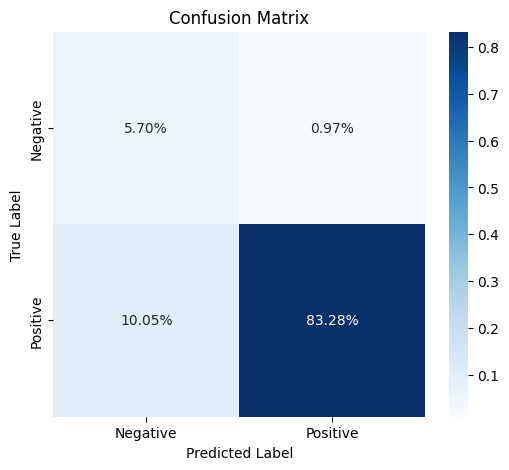


ROC CURVE



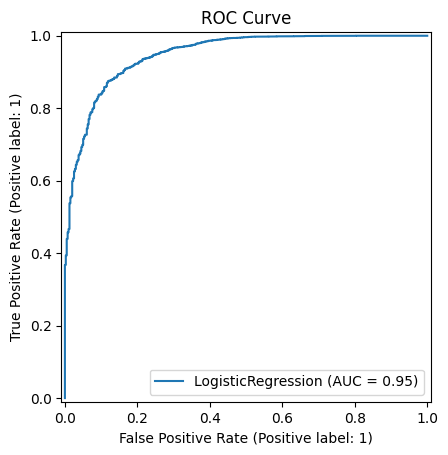


MODEL EVALUATION COMPLETED



In [124]:
from sklearn.linear_model import LogisticRegression

# Define model and hyperparameter grid
model_lr = LogisticRegression(random_state=42)
param_grid = {
    "C": [0.01, 0.1 ],  # Regularization strength
    "penalty": ["l1", "l2"]  # Regularization type

}

# Create ModelBuilder instance
model_builder_lr = ModelBuilder2(model_lr, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_lr = model_builder_lr.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_lr.train_model()

# Evaluate model
metric_result_lr = model_builder_lr.evaluate_model(y_pred)

### Random Forest


HYPERPARAMETER TUNING STARTED

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.80%
Precision: 97.14%
Recall: 98.40%
F1 Score: 97.76%
ROC-AUC Score: 93.17%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       397
           1       0.97      0.98      0.98      5553

    accuracy                           0.96      5950
   macro avg       0.85      0.79      0.82      5950
weighted avg       0.96      0.96      0.96      5950


CONFUSION MATRIX



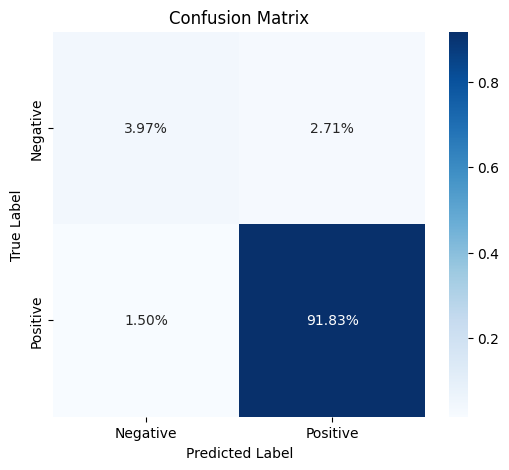


ROC CURVE



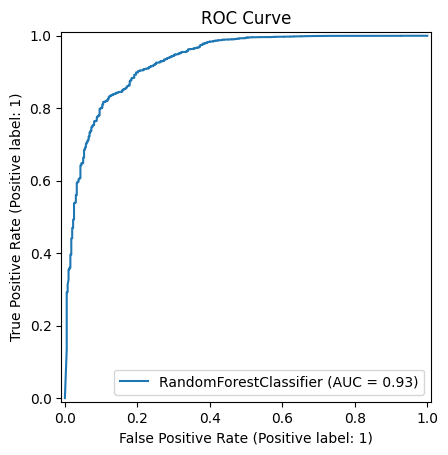


MODEL EVALUATION COMPLETED



In [126]:
from sklearn.ensemble import RandomForestClassifier

# Define model and hyperparameter grid
model_rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10],
    "min_samples_split": [5, 10]
}

# Create ModelBuilder instance
model_builder_rf = ModelBuilder2(model_rf, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_rf = model_builder_rf.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_rf.train_model()

# Evaluate model
metric_result_rf = model_builder_rf.evaluate_model(y_pred)

### XGBoost


HYPERPARAMETER TUNING STARTED

Best Parameters: {'reg_lambda': 0.01, 'n_estimators': 200, 'max_depth': 10, 'gamma': 0.5}

HYPERPARAMETER TUNING COMPLETED


MODEL EVALUATION STARTED


MODEL PERFORMANCE METRICS
Accuracy: 95.48%
Precision: 97.16%
Recall: 98.02%
F1 Score: 97.59%
ROC-AUC Score: 92.84%


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       397
           1       0.97      0.98      0.98      5553

    accuracy                           0.95      5950
   macro avg       0.83      0.79      0.81      5950
weighted avg       0.95      0.95      0.95      5950


CONFUSION MATRIX



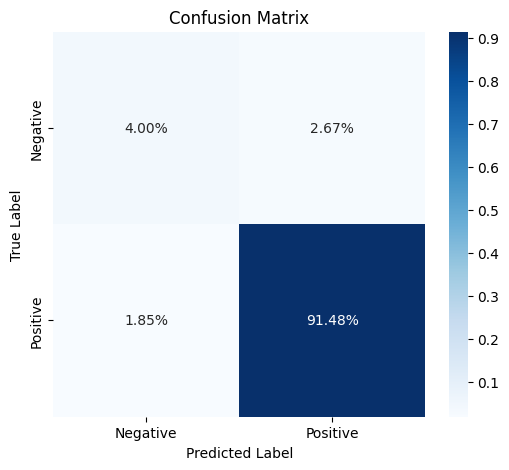


ROC CURVE



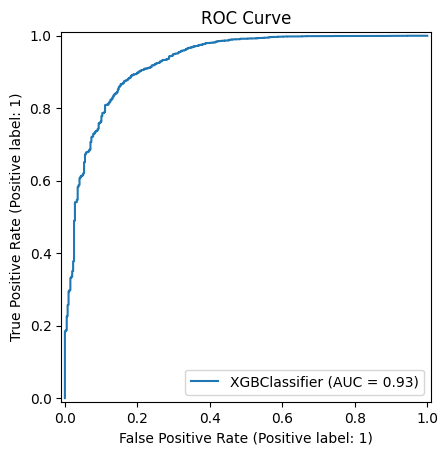


MODEL EVALUATION COMPLETED



In [128]:
from xgboost import XGBClassifier

# Define model and hyperparameter grid
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

param_grid = {
    "n_estimators": [100, 200],  # Number of trees
    "max_depth": [5, 10],  # Tree depth
    "gamma": [0.1,  0.5],  # Minimum loss reduction
    "reg_lambda": [0.01, 0.1],  # L2 regularization
}

# Create ModelBuilder instance
model_builder_xgb = ModelBuilder2(model_xgb, param_grid, X_train_resampled, X_test_combined, y_train_resampled, y_test)

# Perform hyperparameter tuning
best_model_xgb = model_builder_xgb.tune_hyperparameters()

# Train model using best found parameters
y_pred = model_builder_xgb.train_model()

# Evaluate model
metric_result_xgb =  model_builder_xgb.evaluate_model(y_pred)

In [129]:
# Creating a table containing all model evaluation metrics
tuned_metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'],
    'Logistic Regression': pd.Series(metric_result_lr),
    'Random Forest': pd.Series(metric_result_rf),
    'XGBoost': pd.Series(metric_result_xgb)
}

# Convert to DataFrame
df_tuned_metrics = pd.DataFrame(tuned_metrics_data)

# Display the metrics table
df_tuned_metrics

,Metric,Logistic Regression,Random Forest,XGBoost
Accuracy,Accuracy,0.89,0.96,0.95
Precision,Precision,0.99,0.97,0.97
Recall,Recall,0.89,0.98,0.98
F1 Score,F1 Score,0.94,0.98,0.98
ROC-AUC Score,AUC Score,0.95,0.93,0.93


### Saving model

In [131]:
import pickle
import os

def save_object(obj, filename):
    folder = "models"
    os.makedirs(folder, exist_ok=True)  # Ensure directory exists
    filepath = os.path.join(folder, filename + '.pkl')
    with open(filepath, 'wb') as file:
        pickle.dump(obj, file)

# Save best XGBoost model after tuning
save_object(best_model_xgb, 'sentiment-classification-xg-boost-best-tuned')

# Save features used for model building
save_object(df_final, 'cleaned-data')


# Save TF-IDF vectorizer for text data
save_object(vectorizer, 'tfidf-vectorizer')

In [132]:
# No. of unique products
len(df_reviews['name'].unique())

271

Recommedation system
User and User recommedation system
Item and Item recommedation system

In [134]:
# Train-Test split
train,test = train_test_split(df_reviews, train_size=0.70, random_state=45)
print('train shape =',train.shape)
print('test shape =',test.shape)

train shape = (21000, 15)
test shape = (9000, 15)


In [135]:
# using train dataset, create correlation matrix (user, product, rating)
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)
train_pivot

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zwithanx,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [136]:
train_pivot.loc['amanda']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           1.0
100:Complete First Season (blu-Ray)                                     1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       1.0
2x Ultra Era with Oxi Booster, 50fl oz                                  1.0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           1.0
                                                                       ... 
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    1.0
Weleda Everon Lip Balm                                                  1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   1.0
Yes To Carrots Nourishing Body Wash                                     1.0
Yes To Grapefruit Rejuvenating Body Wash                                1.0
Name: amanda, Length: 254, dtype: float64

In [137]:
dummy_train = train.copy()

# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating', data = dummy_train
).fillna(1)

dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [138]:
# here we are going use the adjusted cosine similarity
import numpy as np

def cosine_similarity(df):
    # using the adjusted cosine similarity
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity
    user_correlation = 1- pairwise_distances(substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df

In [139]:
# Finding user correlations using cosine similarity
user_corr_matrix,normalized_df = cosine_similarity(train_pivot)
user_corr_matrix

array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [140]:
user_corr_matrix.shape

(18205, 18205)

In [141]:
# marking the negative correlations as zero
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [142]:
df_reviews[df_reviews['reviews_username'] == 'amanda']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
29,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2015-12-24T00:00:00.000Z,False,True,5,Great product! Exactly what it says works very well,Amazing,NaN,NaN,amanda,Positive
21128,AVpfM_ytilAPnD_xXIJb,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Food & Beverage,Cookies, Chips & Snacks,Chips,Food & Beverage Ways To Shop,Tailgating Essentials,Featured Brands,Snacks, Cookies & Chips,Grocery & Gourmet Food,Snack Foods,Chips & Crisps,Tortilla",Tostitos,Tostitos Bite Size Tortilla Chips,2016-12-03T00:00:00.000Z,True,True,5,Product was easily found and readily available. Most chips were full so they definitely handled with care,Organized,NaN,NaN,amanda,Positive
24566,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2015-07-31T00:00:00.000Z,NaN,True,5,It is a good movie. Bought this for a friend as a gift but definitely would recommend.,Great movie,NaN,NaN,amanda,Positive
25813,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2014-12-05T00:00:00.000Z,NaN,True,5,Got this on Black Friday for a really good deal! Great movie.,Great movie,NaN,NaN,amanda,Positive
26851,AVpfr5cb1cnluZ0-pZFp,Maaya Home,"Furniture,Kitchen & Dining Furniture,Kitchen Carts & Islands,Home Decor,Dining and Kitchen Furniture,Kitchen Islands and Carts,Home,Home Deals,Kitchen Islands & Carts,Home & Kitchen Features",Boraam - DROPSHIP,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,2016-04-04T14:12:46.000Z,NaN,True,5,"My galley-style kitchen needed more counter/storage space. This small island cart was the perfect addition! It narrow, stylish, practical, and assembling it was super easy! Definitely recommend!",Perfect For Adding Counter Space To A Galley-style Kitchen,NaN,NaN,amanda,Positive


In [143]:
# Prediction of ratings by dot product/ weighted sum of user correlation matrix and train_pivot
user_pred_ratings = np.dot(user_corr_matrix,train_pivot.fillna(0))
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [144]:
user_pred_ratings.shape

(18205, 254)

In [145]:
# Getting ratings only for where ratings not provided by users
user_final_rating = np.multiply(user_pred_ratings,dummy_train)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,437.76,438.27,437.76,437.76,440.06,437.76,437.76,437.76,437.76,441.30,...,437.76,437.76,437.76,437.76,438.87,437.76,437.76,443.40,440.06,437.76
02dakota,2120.12,2138.77,2120.12,2120.12,2120.12,2120.12,2120.12,2120.12,2120.12,2133.05,...,2120.12,2120.12,2121.99,2120.12,2122.19,2120.12,2120.12,2132.79,2120.12,2121.99
02deuce,2120.12,2138.77,2120.12,2120.12,2120.12,2120.12,2120.12,2120.12,2120.12,2133.05,...,2120.12,2120.12,2121.99,2120.12,2122.19,2120.12,2120.12,2132.79,2120.12,2121.99
0325home,5461.35,5465.56,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5465.14,...,5469.99,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5467.89,5464.17,5461.35
06stidriver,5461.35,5465.56,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5465.14,...,5469.99,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5467.89,5464.17,5461.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,456.11,458.60,456.11,456.11,456.11,456.11,456.11,456.11,456.11,461.36,...,457.88,456.11,456.11,456.11,456.11,456.11,456.11,459.71,456.11,456.11
zwithanx,5461.35,5465.56,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5465.14,...,5469.99,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5467.89,5464.17,5461.35
zxcsdfd,5461.35,5465.56,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5465.14,...,5469.99,5461.35,5461.35,5461.35,5461.35,5461.35,5461.35,5467.89,5464.17,5461.35


In [146]:
# Getting top 20 recommendations for amanda
user_final_rating.loc['amanda'].sort_values(ascending=False)[:20]

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    116.31
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          116.11
Chester's Cheese Flavored Puffcorn Snacks                                          111.48
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               111.41
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                110.56
Mike Dave Need Wedding Dates (dvd + Digital)                                       108.51
Clorox Disinfecting Bathroom Cleaner                                               107.75
The Resident Evil Collection 5 Discs (blu-Ray)                                     106.62
Red (special Edition) (dvdvideo)                                                   106.61
Bisquick Original Pancake And Baking Mix - 40oz                                    104.83
Alex Cross (dvdvideo)                                                              104.57
Horme

In [147]:
# Creating a pickle file for user-user recommendation system
pickle.dump(user_final_rating,open('models/user_final_rating.pkl','wb'))

Evaluation for user-user recommendation system

In [149]:
# finding common users between train and test data, since we have user correlation matric only for the train dataset
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2006, 15)

In [150]:
# Converting user correlation matrix to dataframe
corr_df = pd.DataFrame(user_corr_matrix)

In [151]:
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18201,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18202,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18203,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [152]:
# Assigning row names to the df using normalized df
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
06stidriver,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
zxcsdfd,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [153]:
# Getting column names as user names for the corr df
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [154]:
# Converting common user names to a list
list_name = common.reviews_username.tolist()

In [155]:
# getting corr for common users only - subtracting from rows
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [156]:
# getting corr for common users only - subtracting from columns
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T

# this is final common users correlation df
corr_df3.head()

,1234,123charlie,143st,1943,4cloroxl,50cal,7inthenest,aac06002,aaron,abby,...,yeya,ygtz,yohnie1,yshan,yucky111,yummy,yvonne,zburt5,zebras,zippy
user_name,,,,,,,,,,,,,,,,,,,,,
1234,1.00,0.68,0.0,0.22,0.0,0.51,0.0,0.0,0.84,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28
123charlie,0.68,1.00,0.0,0.00,0.0,0.00,0.0,0.0,0.66,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
143st,0.00,0.00,1.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1943,0.22,0.00,0.0,1.00,0.0,0.44,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24
4cloroxl,0.00,0.00,0.0,0.00,1.0,0.00,1.0,0.0,0.00,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00


In [157]:
# Preparing common users rating df
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_user_tb

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# eliminating all negative corrs and making them to zero
corr_df3[corr_df3<0] = 0

# getting predicted rating of common users by weighted sum of user_corr and common_user_rating_df
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[7.4987797 , 1.20864234, 0.        , ..., 7.64092148, 0.92858292,
        0.        ],
       [1.74826633, 0.        , 0.        , ..., 3.36140237, 0.        ,
        0.        ],
       [5.67106405, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 6.10152667, 0.        ,
        0.        ],
       [6.79815093, 1.31072544, 1.07870809, ..., 5.89883029, 1.01174853,
        0.        ]])

In [159]:
# Creating dummy test df with ratings as 1 where ratings is present else putting 0 for evaluation
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# getting predicted ratings only where original ratings is present by mat mul
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,68.11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# Applying scaling for ratings to range it in between 1 to 5 only
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [162]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1787

In [163]:
# Getting common users df for actual ratings
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# Calculate RMSE for actual vs predicted ratings
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.8755890184650452


Item and Item recommendation system

In [166]:
# train pivot df for item item based
train_pivot_ii = train_pivot.T
train_pivot_ii

reviews_username,00sab00,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zowie,zozo0o,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [167]:
# Getting item correlation matrix and normalized ratings df
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [168]:
# Predicted ratings using dot product, weighted sum of item corr and train ratings df
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [169]:
#Predicted final ratings for only items where ratings is not present
item_final_rating = np.multiply(item_pred_rating,dummy_train)
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.04,0.83,0.90,0.87,1.26,0.86,0.93,0.90,0.90,0.78,...,0.63,0.90,0.95,0.93,0.99,0.79,0.87,0.83,0.81,0.79
02dakota,1.02,0.82,0.89,0.85,1.15,0.85,0.92,0.89,0.89,0.74,...,0.57,0.89,1.00,0.92,1.00,0.76,0.86,0.76,0.75,0.77
02deuce,1.03,0.83,0.90,0.85,1.15,0.85,0.93,0.90,0.90,0.75,...,0.59,0.90,0.99,0.93,0.99,0.77,0.86,0.78,0.76,0.78
0325home,1.01,0.67,0.88,0.83,1.14,0.83,0.91,0.88,0.88,0.60,...,0.53,0.88,0.92,0.91,0.93,0.73,0.84,0.60,0.70,0.71
06stidriver,1.01,0.67,0.88,0.83,1.14,0.83,0.91,0.88,0.88,0.60,...,0.53,0.88,0.92,0.91,0.93,0.73,0.84,0.60,0.70,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.04,0.82,0.90,0.86,1.15,0.86,0.93,0.90,0.90,0.78,...,0.62,0.90,0.94,0.93,0.95,0.78,0.87,0.81,0.78,0.78
zwithanx,1.01,0.67,0.88,0.83,1.14,0.83,0.91,0.88,0.88,0.60,...,0.53,0.88,0.92,0.91,0.93,0.73,0.84,0.60,0.70,0.71
zxcsdfd,1.01,0.67,0.88,0.83,1.14,0.83,0.91,0.88,0.88,0.60,...,0.53,0.88,0.92,0.91,0.93,0.73,0.84,0.60,0.70,0.71


In [170]:
# Finding top 20 recommendation for amanda
item_final_rating.loc['amanda'].sort_values(ascending=False)[:20]

name
Cantu Coconut Milk Shine Hold Mist - 8oz                                                  2.76
Newman's Own Organics Licorice Twist, Black 5oz                                           2.50
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel                           2.48
Naturtint Nutrideep Multiplier Protective Cream                                           2.25
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                 2.18
Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box    2.18
Home Health Hairever Shampoo                                                              2.15
Chips Deluxe Soft 'n Chewy Cookies                                                        2.07
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                           1.92
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                                  1.91
Various - Country's Greatest Gospel:Gold Ed (

In [171]:
# Finding common items from train and test data set because we only have item correlation for train data
common_item = test[test.name.isin(train.name)]
common_item

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
19154,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-12-30T00:00:00.000Z,False,True,5,"Very powerful, great at removing stains, and so convenient to use...just grab and go! This review was collected as part of a promotion.",Clorox Rocks,NaN,NaN,briley,Positive
22871,AVpfov9TLJeJML43A7B0,Bisquick,"Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,Mor...","GENERAL MILLS SALES, INC.",Bisquick Original Pancake And Baking Mix - 40oz,2012-07-25T00:00:00.000Z,False,True,5,"you can do sooooo much with this product..biscuits, impossible pies, shortcake, deserts, think them up yourself or go to the Betty Crocker recipe site to get some ideas... I looked at a few and thought of many more on my own...",Alot of a good thing!!!,NaN,NaN,foxfire61,Positive
11830,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Clea...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-05T00:00:00.000Z,False,True,5,I love the lemon fresh smell it leaves. I know that what ever I use the Clorox wipe it will be clean. It is extremely important since my son is in the process of getting chemotherapy. Must have a germ free home. This review was collected as part of a promotion.,Keep Cancer Home Germ Free,NaN,NaN,margies,Positive
707,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2015-08-18T00:00:00.000Z,False,False,1,"Windex used to be the best but whatever they have done to the formula has now made it horrible. It leaves a film on all the windows, mirrors, and glass table tops. What happened Waste of my money. Will not buy and do not recommend.",no longer a good glass cleaner,NaN,NaN,mel,Negative
20513,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-04-07T12:05:20.000Z,NaN,NaN,5,I have two sons and they make a mess in their bathroom and this product handles it with no problem,Great In Showers,NaN,NaN,jillybeansoccermom,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28158,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2014-11-07T00:00:00.000Z,NaN,True,5,Great family movie. My kids loved it. 

In [172]:
# Common items matrix
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T
common_item_pivot.shape

(206, 8379)

In [173]:
# Common items dataframe
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.00e+00,-1.19e-03,-1.69e-04,-2.38e-04,-1.20e-04,-2.39e-04,-1.20e-04,-1.69e-04,-1.69e-04,-1.15e-03,...,-9.10e-04,-1.69e-04,-1.67e-04,-1.20e-04,-2.07e-04,-3.76e-04,-2.22e-04,-1.61e-03,-7.26e-04,-5.88e-04
1,-1.19e-03,1.00e+00,-7.72e-04,-1.08e-03,-5.46e-04,-1.09e-03,-5.46e-04,-7.72e-04,-7.72e-04,-5.24e-03,...,-4.15e-03,-7.72e-04,-7.64e-04,-5.46e-04,-9.45e-04,-1.72e-03,-1.01e-03,-5.25e-03,-3.31e-03,-2.69e-03
2,-1.69e-04,-7.72e-04,1.00e+00,-1.54e-04,-7.77e-05,-1.55e-04,-7.77e-05,-1.10e-04,-1.10e-04,-7.46e-04,...,-5.91e-04,-1.10e-04,-1.09e-04,-7.77e-05,-1.35e-04,-2.44e-04,-1.44e-04,-1.05e-03,-4.72e-04,-3.82e-04
3,-2.38e-04,-1.08e-03,-1.54e-04,1.00e+00,-1.09e-04,-2.18e-04,-1.09e-04,-1.54e-04,-1.54e-04,-1.05e-03,...,-8.31e-04,-1.54e-04,-1.53e-04,-1.09e-04,-1.89e-04,-3.43e-04,-2.03e-04,-1.47e-03,-6.63e-04,-5.37e-04
4,-1.20e-04,-5.46e-04,-7.77e-05,-1.09e-04,1.00e+00,-1.10e-04,-5.49e-05,-7.77e-05,-7.77e-05,-5.28e-04,...,-4.18e-04,-7.77e-05,-7.69e-05,-5.49e-05,-9.52e-05,-1.73e-04,-1.02e-04,-7.40e-04,1.71e-01,-2.70e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-3.76e-04,-1.72e-03,-2.44e-04,-3.43e-04,-1.73e-04,-3.46e-04,-1.73e-04,-2.44e-04,-2.44e-04,-1.66e-03,...,-1.31e-03,-2.44e-04,-2.42e-04,-1.73e-04,-2.99e-04,1.00e+00,-3.21e-04,-2.33e-03,-1.05e-03,-8.50e-04
250,-2.22e-04,-1.01e-03,-1.44e-04,-2.03e-04,-1.02e-04,-2.04e-04,-1.02e-04,-1.44e-04,-1.44e-04,-9.80e-04,...,-7.76e-04,-1.44e-04,-1.43e-04,-1.02e-04,-1.77e-04,-3.21e-04,1.00e+00,-1.37e-03,-6.19e-04,-5.02e-04
251,-1.61e-03,-5.25e-03,-1.05e-03,-1.47e-03,-7.40e-04,-1.48e-03,-7.40e-04,-1.05e-03,-1.05e-03,2.32e-03,...,-5.63e-03,-1.05e-03,-1.04e-03,-7.40e-04,-1.28e-03,-2.33e-03,-1.37e-03,1.00e+00,-4.49e-03,-3.64e-03
252,-7.26e-04,-3.31e-03,-4.72e-04,-6.63e-04,1.71e-01,-6.67e-04,-3.34e-04,-4.72e-04,-4.72e-04,-3.20e-03,...,-2.54e-03,-4.72e-04,-4.67e-04,-3.34e-04,-5.78e-04,-1.05e-03,-6.19e-04,-4.49e-03,1.00e+00,-1.64e-03


In [174]:
# Assigning row names as product names from normalized df
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.00e+00,-1.19e-03,-1.69e-04,-2.38e-04,-1.20e-04,-2.39e-04,-1.20e-04,-1.69e-04,-1.69e-04,-1.15e-03,...,-9.10e-04,-1.69e-04,-1.67e-04,-1.20e-04,-2.07e-04,-3.76e-04,-2.22e-04,-1.61e-03,-7.26e-04,-5.88e-04
100:Complete First Season (blu-Ray),-1.19e-03,1.00e+00,-7.72e-04,-1.08e-03,-5.46e-04,-1.09e-03,-5.46e-04,-7.72e-04,-7.72e-04,-5.24e-03,...,-4.15e-03,-7.72e-04,-7.64e-04,-5.46e-04,-9.45e-04,-1.72e-03,-1.01e-03,-5.25e-03,-3.31e-03,-2.69e-03
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-1.69e-04,-7.72e-04,1.00e+00,-1.54e-04,-7.77e-05,-1.55e-04,-7.77e-05,-1.10e-04,-1.10e-04,-7.46e-04,...,-5.91e-04,-1.10e-04,-1.09e-04,-7.77e-05,-1.35e-04,-2.44e-04,-1.44e-04,-1.05e-03,-4.72e-04,-3.82e-04
"2x Ultra Era with Oxi Booster, 50fl oz",-2.38e-04,-1.08e-03,-1.54e-04,1.00e+00,-1.09e-04,-2.18e-04,-1.09e-04,-1.54e-04,-1.54e-04,-1.05e-03,...,-8.31e-04,-1.54e-04,-1.53e-04,-1.09e-04,-1.89e-04,-3.43e-04,-2.03e-04,-1.47e-03,-6.63e-04,-5.37e-04
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-1.20e-04,-5.46e-04,-7.77e-05,-1.09e-04,1.00e+00,-1.10e-04,-5.49e-05,-7.77e-05,-7.77e-05,-5.28e-04,...,-4.18e-04,-7.77e-05,-7.69e-05,-5.49e-05,-9.52e-05,-1.73e-04,-1.02e-04,-7.40e-04,1.71e-01,-2.70e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-3.76e-04,-1.72e-03,-2.44e-04,-3.43e-04,-1.73e-04,-3.46e-04,-1.73e-04,-2.44e-04,-2.44e-04,-1.66e-03,...,-1.31e-03,-2.44e-04,-2.42e-04,-1.73e-04,-2.99e-04,1.00e+00,-3.21e-04,-2.33e-03,-1.05e-03,-8.50e-04
Weleda Everon Lip Balm,-2.22e-04,-1.01e-03,-1.44e-04,-2.03e-04,-1.02e-04,-2.04e-04,-1.02e-04,-1.44e-04,-1.44e-04,-9.80e-04,...,-7.76e-04,-1.44e-04,-1.43e-04,-1.02e-04,-1.77e-04,-3.21e-04,1.00e+00,-1.37e-03,-6.19e-04,-5.02e-04
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-1.61e-03,-5.25e-03,-1.05e-03,-1.47e-03,-7.40e-04,-1.48e-03,-7.40e-04,-1.05e-03,-1.05e-03,2.32e-03,...,-5.63e-03,-1.05e-03,-1.04e-03,-7.40e-04,-1.28e-03,-2.33e-03,-1.37e-03,1.00e+00,-4.49e-03,-3.64e-03


In [175]:
# Assigning column names to corr df using normalized df
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.00e+00,-1.19e-03,-1.69e-04,-2.38e-04,-1.20e-04,-2.39e-04,-1.20e-04,-1.69e-04,-1.69e-04,-1.15e-03,...,-9.10e-04,-1.69e-04,-1.67e-04,-1.20e-04,-2.07e-04,-3.76e-04,-2.22e-04,-1.61e-03,-7.26e-04,-5.88e-04
100:Complete First Season (blu-Ray),-1.19e-03,1.00e+00,-7.72e-04,-1.08e-03,-5.46e-04,-1.09e-03,-5.46e-04,-7.72e-04,-7.72e-04,-5.24e-03,...,-4.15e-03,-7.72e-04,-7.64e-04,-5.46e-04,-9.45e-04,-1.72e-03,-1.01e-03,-5.25e-03,-3.31e-03,-2.69e-03
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-1.69e-04,-7.72e-04,1.00e+00,-1.54e-04,-7.77e-05,-1.55e-04,-7.77e-05,-1.10e-04,-1.10e-04,-7.46e-04,...,-5.91e-04,-1.10e-04,-1.09e-04,-7.77e-05,-1.35e-04,-2.44e-04,-1.44e-04,-1.05e-03,-4.72e-04,-3.82e-04
"2x Ultra Era with Oxi Booster, 50fl oz",-2.38e-04,-1.08e-03,-1.54e-04,1.00e+00,-1.09e-04,-2.18e-04,-1.09e-04,-1.54e-04,-1.54e-04,-1.05e-03,...,-8.31e-04,-1.54e-04,-1.53e-04,-1.09e-04,-1.89e-04,-3.43e-04,-2.03e-04,-1.47e-03,-6.63e-04,-5.37e-04
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-1.20e-04,-5.46e-04,-7.77e-05,-1.09e-04,1.00e+00,-1.10e-04,-5.49e-05,-7.77e-05,-7.77e-05,-5.28e-04,...,-4.18e-04,-7.77e-05,-7.69e-05,-5.49e-05,-9.52e-05,-1.73e-04,-1.02e-04,-7.40e-04,1.71e-01,-2.70e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-3.76e-04,-1.72e-03,-2.44e-04,-3.43e-04,-1.73e-04,-3.46e-04,-1.73e-04,-2.44e-04,-2.44e-04,-1.66e-03,...,-1.31e-03,-2.44e-04,-2.42e-04,-1.73e-04,-2.99e-04,1.00e+00,-3.21e-04,-2.33e-03,-1.05e-03,-8.50e-04
Weleda Everon Lip Balm,-2.22e-04,-1.01e-03,-1.44e-04,-2.03e-04,-1.02e-04,-2.04e-04,-1.02e-04,-1.44e-04,-1.44e-04,-9.80e-04,...,-7.76e-04,-1.44e-04,-1.43e-04,-1.02e-04,-1.77e-04,-3.21e-04,1.00e+00,-1.37e-03,-6.19e-04,-5.02e-04
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-1.61e-03,-5.25e-03,-1.05e-03,-1.47e-03,-7.40e-04,-1.48e-03,-7.40e-04,-1.05e-03,-1.05e-03,2.32e-03,...,-5.63e-03,-1.05e-03,-1.04e-03,-7.40e-04,-1.28e-03,-2.33e-03,-1.37e-03,1.00e+00,-4.49e-03,-3.64e-03


In [176]:
# Printing common items as list
list_items

['Clorox Disinfecting Bathroom Cleaner',
 'Bisquick Original Pancake And Baking Mix - 40oz',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Clorox Disinfecting Bathroom Cleaner',
 'Clorox Disinfecting Bathroom Cleaner',
 'Nexxus Exxtra Gel Style Creation Sculptor',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
 'Clorox Disinfecting Bathroom Cleaner',
 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 "Jason Aldean - They Don't Know",
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Sc

In [177]:
# Common product names correlation df, subtracting from rows
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.00e+00,-1.19e-03,-1.69e-04,-2.38e-04,-1.20e-04,-2.39e-04,-1.20e-04,-1.69e-04,-1.69e-04,-1.15e-03,...,-9.10e-04,-1.69e-04,-1.67e-04,-1.20e-04,-2.07e-04,-3.76e-04,-2.22e-04,-1.61e-03,-7.26e-04,-5.88e-04
100:Complete First Season (blu-Ray),-1.19e-03,1.00e+00,-7.72e-04,-1.08e-03,-5.46e-04,-1.09e-03,-5.46e-04,-7.72e-04,-7.72e-04,-5.24e-03,...,-4.15e-03,-7.72e-04,-7.64e-04,-5.46e-04,-9.45e-04,-1.72e-03,-1.01e-03,-5.25e-03,-3.31e-03,-2.69e-03
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-1.69e-04,-7.72e-04,1.00e+00,-1.54e-04,-7.77e-05,-1.55e-04,-7.77e-05,-1.10e-04,-1.10e-04,-7.46e-04,...,-5.91e-04,-1.10e-04,-1.09e-04,-7.77e-05,-1.35e-04,-2.44e-04,-1.44e-04,-1.05e-03,-4.72e-04,-3.82e-04
"2x Ultra Era with Oxi Booster, 50fl oz",-2.38e-04,-1.08e-03,-1.54e-04,1.00e+00,-1.09e-04,-2.18e-04,-1.09e-04,-1.54e-04,-1.54e-04,-1.05e-03,...,-8.31e-04,-1.54e-04,-1.53e-04,-1.09e-04,-1.89e-04,-3.43e-04,-2.03e-04,-1.47e-03,-6.63e-04,-5.37e-04
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-2.39e-04,-1.09e-03,-1.55e-04,-2.18e-04,-1.10e-04,1.00e+00,-1.10e-04,-1.55e-04,-1.55e-04,-1.06e-03,...,-8.36e-04,-1.55e-04,-1.54e-04,-1.10e-04,-1.90e-04,-3.46e-04,-2.04e-04,-1.48e-03,-6.67e-04,-5.41e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-3.76e-04,-1.72e-03,-2.44e-04,-3.43e-04,-1.73e-04,-3.46e-04,-1.73e-04,-2.44e-04,-2.44e-04,-1.66e-03,...,-1.31e-03,-2.44e-04,-2.42e-04,-1.73e-04,-2.99e-04,1.00e+00,-3.21e-04,-2.33e-03,-1.05e-03,-8.50e-04
Weleda Everon Lip Balm,-2.22e-04,-1.01e-03,-1.44e-04,-2.03e-04,-1.02e-04,-2.04e-04,-1.02e-04,-1.44e-04,-1.44e-04,-9.80e-04,...,-7.76e-04,-1.44e-04,-1.43e-04,-1.02e-04,-1.77e-04,-3.21e-04,1.00e+00,-1.37e-03,-6.19e-04,-5.02e-04
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-1.61e-03,-5.25e-03,-1.05e-03,-1.47e-03,-7.40e-04,-1.48e-03,-7.40e-04,-1.05e-03,-1.05e-03,2.32e-03,...,-5.63e-03,-1.05e-03,-1.04e-03,-7.40e-04,-1.28e-03,-2.33e-03,-1.37e-03,1.00e+00,-4.49e-03,-3.64e-03


In [178]:
# Common product names correlation df, subtracting from columns
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T

# Final items corr df for common users
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.00e+00,-1.19e-03,-1.69e-04,-2.38e-04,-2.39e-04,-1.69e-04,-1.69e-04,-1.15e-03,-3.37e-04,-1.67e-04,...,-1.04e-03,-9.10e-04,-1.69e-04,-1.67e-04,-2.07e-04,-3.76e-04,-2.22e-04,-1.61e-03,-7.26e-04,-5.88e-04
100:Complete First Season (blu-Ray),-1.19e-03,1.00e+00,-7.72e-04,-1.08e-03,-1.09e-03,-7.72e-04,-7.72e-04,-5.24e-03,-1.54e-03,-7.64e-04,...,-4.73e-03,-4.15e-03,-7.72e-04,-7.64e-04,-9.45e-04,-1.72e-03,-1.01e-03,-5.25e-03,-3.31e-03,-2.69e-03
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-1.69e-04,-7.72e-04,1.00e+00,-1.54e-04,-1.55e-04,-1.10e-04,-1.10e-04,-7.46e-04,-2.19e-04,-1.09e-04,...,-6.73e-04,-5.91e-04,-1.10e-04,-1.09e-04,-1.35e-04,-2.44e-04,-1.44e-04,-1.05e-03,-4.72e-04,-3.82e-04
"2x Ultra Era with Oxi Booster, 50fl oz",-2.38e-04,-1.08e-03,-1.54e-04,1.00e+00,-2.18e-04,-1.54e-04,-1.54e-04,-1.05e-03,-3.08e-04,-1.53e-04,...,-9.45e-04,-8.31e-04,-1.54e-04,-1.53e-04,-1.89e-04,-3.43e-04,-2.03e-04,-1.47e-03,-6.63e-04,-5.37e-04
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-2.39e-04,-1.09e-03,-1.55e-04,-2.18e-04,1.00e+00,-1.55e-04,-1.55e-04,-1.06e-03,-3.10e-04,-1.54e-04,...,-9.51e-04,-8.36e-04,-1.55e-04,-1.54e-04,-1.90e-04,-3.46e-04,-2.04e-04,-1.48e-03,-6.67e-04,-5.41e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-3.76e-04,-1.72e-03,-2.44e-04,-3.43e-04,-3.46e-04,-2.44e-04,-2.44e-04,-1.66e-03,-4.87e-04,-2.42e-04,...,-1.50e-03,-1.31e-03,-2.44e-04,-2.42e-04,-2.99e-04,1.00e+00,-3.21e-04,-2.33e-03,-1.05e-03,-8.50e-04
Weleda Everon Lip Balm,-2.22e-04,-1.01e-03,-1.44e-04,-2.03e-04,-2.04e-04,-1.44e-04,-1.44e-04,-9.80e-04,-2.88e-04,-1.43e-04,...,-8.84e-04,-7.76e-04,-1.44e-04,-1.43e-04,-1.77e-04,-3.21e-04,1.00e+00,-1.37e-03,-6.19e-04,-5.02e-04
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-1.61e-03,-5.25e-03,-1.05e-03,-1.47e-03,-1.48e-03,-1.05e-03,-1.05e-03,2.32e-03,-2.09e-03,-1.04e-03,...,3.02e-03,-5.63e-03,-1.05e-03,-1.04e-03,-1.28e-03,-2.33e-03,-1.37e-03,1.00e+00,-4.49e-03,-3.64e-03


In [179]:
# Ignoring negative corrs and setting them to zero
item_corr_df3[item_corr_df3<0] = 0

# Finding common products predicted ratings as weighted sum of item corr and item df
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(206, 8379)

In [180]:
# Getting common ratings df
test_items = common_item.copy()

#we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train
test_items['reviews_rating'] = test_items['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)

# Predicted ratings for common users
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

reviews_username,00dog3,01impala,08dallas,09mommy11,1143mom,1234,123charlie,123numbers,12cass12,132457,...,zombiedad80,zombiegirl22,zombiekiller,zoney86,zookeeper,zpalma,zsarah,zulaa118,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
# Scaling the ratings value between 1 to 5 only
X  = final_item_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [182]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [183]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

3.5542893759626466


In [184]:
user_final_rating.loc['amanda']

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest           103.06
100:Complete First Season (blu-Ray)                                     102.81
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black       101.76
2x Ultra Era with Oxi Booster, 50fl oz                                  101.76
42 Dual Drop Leaf Table with 2 Madrid Chairs"                           101.76
                                                                         ...  
WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black    101.76
Weleda Everon Lip Balm                                                  101.76
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                   103.17
Yes To Carrots Nourishing Body Wash                                     101.76
Yes To Grapefruit Rejuvenating Body Wash                                101.76
Name: amanda, Length: 254, dtype: float64

In [185]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
  # Loading the best recommendation model
  user_final_rating = pickle.load(open('models/user_final_rating.pkl','rb'))
  if user_name not in user_final_rating.index:
    print(f"The User {user_name} does not exist. Please provide a valid user name")
  else:
    # Get top 20 recommended products from the best recommendation model
    top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)

    # Get only the recommended products from the prepared dataframe "df_final" and their non-redundant clean reviews text
    df_final = pickle.load(open('models/cleaned-data.pkl','rb'))
    df_top20_products = df_final[df_final.name.isin(top20_recommended_products)].drop_duplicates(subset=['cleaned_review'])

    # Ppass them through TF-IDF vectorizer to convert the data into suitable format for modeling predictions
    tfidf = pickle.load(open('models/tfidf-vectorizer.pkl','rb'))
    X = tfidf.transform(df_top20_products['cleaned_review'])
    # Create a DataFrame from the TF-IDF transformed data with the correct feature names
    X_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

    # Ensure numerical features are from df_top20_products, not df_final since our xgbm needs num and text features both
    # X_num = df_top20_products[['review_length', 'word_count', 'vader_sentiment', 'normalized_rating']]
    X_num = df_top20_products[['review_length']]

    # Reset indices before concatenation
    X_df = X_df.reset_index(drop=True)
    X_num = X_num.reset_index(drop=True)
    # Concatenate the TF-IDF and numerical features with the training features order first
    df_top_20_products_final_features = pd.concat([X_df, X_num], axis=1)

    # Use the best sentiment model to predict the sentiment for these user reviews
    xgb = pickle.load(open('models/sentiment-classification-xg-boost-best-tuned.pkl','rb'))
    # Predict on the DataFrame used for feature engineering, ensuring matching indices
    df_top20_products['predicted_sentiment'] = xgb.predict(df_top_20_products_final_features)

    # Create a new column to map Positive sentiment to 1 and Negative sentiment to 0. This will allow us to easily summarize the data
    df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x==1 else 0)

    # Create a new dataframe "pred_df" to store the count of positive user sentiments
    pred_df = df_top20_products.groupby(by='name').sum()
    pred_df = pred_df.rename(columns={'positive_sentiment': 'pos_sent_count'})

    # Create a column to measure the total sentiment count
    pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()

    # Create a column that measures the % of positive user sentiment for each product review
    pred_df['pos_sent_percentage'] = np.round(pred_df['pos_sent_count']/pred_df['total_sent_count']*100,2)

    # Reset index to make 'name' a column instead of the index
    pred_df = pred_df.reset_index()

    # Return top 5 recommended products to the user
    result = pred_df.sort_values(by='pos_sent_percentage', ascending=False)[:5][['name', 'pos_sent_percentage']]
    return result

In [186]:
product_recommendations_user('amanda')

,name,pos_sent_percentage
0,Alex Cross (dvdvideo),0.0
10,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,0.0
17,The Resident Evil Collection 5 Discs (blu-Ray),0.0
16,Red (special Edition) (dvdvideo),0.0
15,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),0.0
